<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
AAPL = pd.read_csv("Database/Pre_Processed_AAPL.csv")
TSLA = pd.read_csv("Database/Pre_Processed_TSLA.csv")
GOOG = pd.read_csv("Database/Pre_Processed_GOOG.csv")
MSFT = pd.read_csv("Database/Pre_Processed_MSFT.csv")
AMZN = pd.read_csv("Database/Pre_Processed_AMZN.csv")

### Data Proprocessing

In [3]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [4]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [5]:
model = Model()

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 200)              │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 548,005 (2.09 MB)

 Trainable params: 548,005 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

### Custom Learning Rate

In [8]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

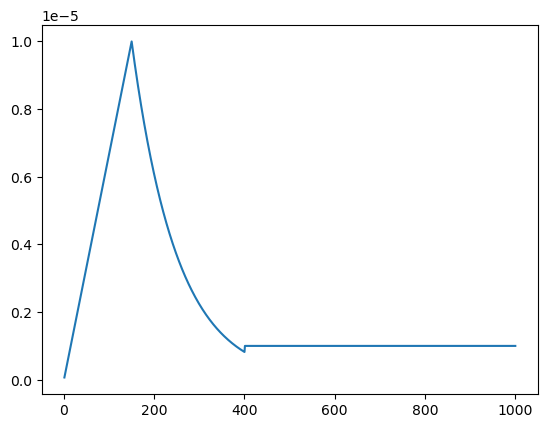

In [9]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [10]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#Apple

In [11]:
AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [13]:
# Change Dtype of Date column
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [14]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)

### Model Fitting

In [15]:
AAPL_Model = Model()

In [17]:
from tensorflow.keras.metrics import RootMeanSquaredError

AAPL_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [18]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2301.1472 - root_mean_squared_error: 47.9655 - val_loss: 15551.4248 - val_root_mean_squared_error: 124.7054 - learning_rate: 0.0000e+00
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2537.2615 - root_mean_squared_error: 50.3167 - val_loss: 15551.1201 - val_root_mean_squared_error: 124.7041 - learning_rate: 6.6667e-08
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2305.4478 - root_mean_squared_error: 48.0101 - val_loss: 15550.5332 - val_root_mean_squared_error: 124.7018 - learning_rate: 1.3333e-07
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2307.9258 - root_mean_squared_error: 48.0332 - val_loss: 15549.6152 - val_root_mean_squared_error: 124.6981 - learning_rate: 2.0000e-07
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2426.9941 - root_mean_squared_error: 49.2383 - val_loss: 15548.3828 - val_root_mean_squared_error: 124.6932 - learning_rate: 2.6667e-07
Epoch 6/1000
9/9 ━━━━━━━━

Epoch 37/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2363.1929 - root_mean_squared_error: 48.5538 - val_loss: 15312.8652 - val_root_mean_squared_error: 123.7452 - learning_rate: 2.4000e-06
Epoch 38/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2302.2905 - root_mean_squared_error: 47.9309 - val_loss: 15295.2451 - val_root_mean_squared_error: 123.6740 - learning_rate: 2.4667e-06
Epoch 39/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2401.8269 - root_mean_squared_error: 48.9779 - val_loss: 15275.7783 - val_root_mean_squared_error: 123.5952 - learning_rate: 2.5333e-06
Epoch 40/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2375.6724 - root_mean_squared_error: 48.7178 - val_loss: 15255.6689 - val_root_mean_squared_error: 123.5138 - learning_rate: 2.6000e-06
Epoch 41/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2323.0269 - root_mean_squared_error: 48.1789 - val_loss: 15234.4092 - val_root_mean_squared_error: 123.4277 - learning_rate: 2.6667e-06
Epoch 42/1000
9/9 ━━

Epoch 73/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1712.3749 - root_mean_squared_error: 41.3714 - val_loss: 11252.2461 - val_root_mean_squared_error: 106.0766 - learning_rate: 4.8000e-06
Epoch 74/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1690.3914 - root_mean_squared_error: 41.0845 - val_loss: 10959.0547 - val_root_mean_squared_error: 104.6855 - learning_rate: 4.8667e-06
Epoch 75/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1745.0056 - root_mean_squared_error: 41.7624 - val_loss: 10653.9375 - val_root_mean_squared_error: 103.2179 - learning_rate: 4.9333e-06
Epoch 76/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1617.8743 - root_mean_squared_error: 40.2078 - val_loss: 10348.1279 - val_root_mean_squared_error: 101.7257 - learning_rate: 5.0000e-06
Epoch 77/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1658.1748 - root_mean_squared_error: 40.7136 - val_loss: 10021.3047 - val_root_mean_squared_error: 100.1065 - learning_rate: 5.0667e-06
Epoch 78/1000
9/9 ━━

Epoch 109/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 912.7042 - root_mean_squared_error: 30.2063 - val_loss: 5155.3374 - val_root_mean_squared_error: 71.8007 - learning_rate: 7.2000e-06
Epoch 110/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 780.6544 - root_mean_squared_error: 27.9345 - val_loss: 4688.4829 - val_root_mean_squared_error: 68.4725 - learning_rate: 7.2667e-06
Epoch 111/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 715.6109 - root_mean_squared_error: 26.7356 - val_loss: 4314.3765 - val_root_mean_squared_error: 65.6839 - learning_rate: 7.3333e-06
Epoch 112/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 705.4141 - root_mean_squared_error: 26.5474 - val_loss: 4005.8665 - val_root_mean_squared_error: 63.2919 - learning_rate: 7.4000e-06
Epoch 113/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 648.9316 - root_mean_squared_error: 25.4701 - val_loss: 3774.8474 - val_root_mean_squared_error: 61.4398 - learning_rate: 7.4667e-06
Epoch 114/1000
9/9 ━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3862 - root_mean_squared_error: 3.0576 - val_loss: 32.5670 - val_root_mean_squared_error: 5.7068 - learning_rate: 9.6000e-06
Epoch 146/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.4783 - root_mean_squared_error: 3.2301 - val_loss: 31.8693 - val_root_mean_squared_error: 5.6453 - learning_rate: 9.6667e-06
Epoch 147/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.9834 - root_mean_squared_error: 3.3015 - val_loss: 31.5109 - val_root_mean_squared_error: 5.6135 - learning_rate: 9.7333e-06
Epoch 148/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.9112 - root_mean_squared_error: 2.8082 - val_loss: 31.5390 - val_root_mean_squared_error: 5.6160 - learning_rate: 9.8000e-06
Epoch 149/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.9352 - root_mean_squared_error: 2.9836 - val_loss: 30.6788 - val_root_mean_squared_error: 5.5388 - learning_rate: 9.8667e-06
Epoch 150/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.9269 - roo

Epoch 182/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8594 - root_mean_squared_error: 2.7992 - val_loss: 28.1869 - val_root_mean_squared_error: 5.3091 - learning_rate: 7.3345e-06
Epoch 183/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6972 - root_mean_squared_error: 2.5822 - val_loss: 28.0749 - val_root_mean_squared_error: 5.2986 - learning_rate: 7.2615e-06
Epoch 184/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0363 - root_mean_squared_error: 2.4439 - val_loss: 27.8974 - val_root_mean_squared_error: 5.2818 - learning_rate: 7.1892e-06
Epoch 185/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.9611 - root_mean_squared_error: 2.8142 - val_loss: 28.0706 - val_root_mean_squared_error: 5.2982 - learning_rate: 7.1177e-06
Epoch 186/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.3949 - root_mean_squared_error: 2.5148 - val_loss: 27.7924 - val_root_mean_squared_error: 5.2718 - learning_rate: 7.0469e-06
Epoch 187/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 219/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9619 - root_mean_squared_error: 2.4393 - val_loss: 27.2465 - val_root_mean_squared_error: 5.2198 - learning_rate: 5.0662e-06
Epoch 220/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4931 - root_mean_squared_error: 2.3318 - val_loss: 27.1704 - val_root_mean_squared_error: 5.2125 - learning_rate: 5.0158e-06
Epoch 221/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9831 - root_mean_squared_error: 2.4423 - val_loss: 26.9969 - val_root_mean_squared_error: 5.1958 - learning_rate: 4.9659e-06
Epoch 222/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7701 - root_mean_squared_error: 2.3976 - val_loss: 26.5795 - val_root_mean_squared_error: 5.1555 - learning_rate: 4.9164e-06
Epoch 223/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2052 - root_mean_squared_error: 2.4842 - val_loss: 26.3568 - val_root_mean_squared_error: 5.1339 - learning_rate: 4.8675e-06
Epoch 224/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 256/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0883 - root_mean_squared_error: 2.4548 - val_loss: 26.7066 - val_root_mean_squared_error: 5.1678 - learning_rate: 3.4994e-06
Epoch 257/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.1044 - root_mean_squared_error: 2.4552 - val_loss: 26.4981 - val_root_mean_squared_error: 5.1476 - learning_rate: 3.4646e-06
Epoch 258/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.7600 - root_mean_squared_error: 2.1569 - val_loss: 26.9387 - val_root_mean_squared_error: 5.1903 - learning_rate: 3.4301e-06
Epoch 259/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8562 - root_mean_squared_error: 2.7656 - val_loss: 26.3613 - val_root_mean_squared_error: 5.1343 - learning_rate: 3.3960e-06
Epoch 260/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3254 - root_mean_squared_error: 2.6934 - val_loss: 26.5103 - val_root_mean_squared_error: 5.1488 - learning_rate: 3.3622e-06
Epoch 261/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 293/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.4831 - root_mean_squared_error: 2.3340 - val_loss: 26.5798 - val_root_mean_squared_error: 5.1556 - learning_rate: 2.4171e-06
Epoch 294/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7180 - root_mean_squared_error: 2.1622 - val_loss: 26.3769 - val_root_mean_squared_error: 5.1358 - learning_rate: 2.3931e-06
Epoch 295/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.4260 - root_mean_squared_error: 2.7088 - val_loss: 26.3926 - val_root_mean_squared_error: 5.1374 - learning_rate: 2.3693e-06
Epoch 296/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.8215 - root_mean_squared_error: 2.4100 - val_loss: 26.3747 - val_root_mean_squared_error: 5.1356 - learning_rate: 2.3457e-06
Epoch 297/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2852 - root_mean_squared_error: 2.2900 - val_loss: 26.4730 - val_root_mean_squared_error: 5.1452 - learning_rate: 2.3224e-06
Epoch 298/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss:

Epoch 330/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.6527 - root_mean_squared_error: 2.3727 - val_loss: 26.0876 - val_root_mean_squared_error: 5.1076 - learning_rate: 1.6696e-06
Epoch 331/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8971 - root_mean_squared_error: 2.4213 - val_loss: 26.2135 - val_root_mean_squared_error: 5.1199 - learning_rate: 1.6530e-06
Epoch 332/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2208 - root_mean_squared_error: 2.2809 - val_loss: 26.2482 - val_root_mean_squared_error: 5.1233 - learning_rate: 1.6365e-06
Epoch 333/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7238 - root_mean_squared_error: 2.1594 - val_loss: 26.1712 - val_root_mean_squared_error: 5.1158 - learning_rate: 1.6203e-06
Epoch 334/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.4537 - root_mean_squared_error: 2.5372 - val_loss: 26.0741 - val_root_mean_squared_error: 5.1063 - learning_rate: 1.6041e-06
Epoch 335/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

Epoch 367/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8051 - root_mean_squared_error: 2.3935 - val_loss: 25.9656 - val_root_mean_squared_error: 5.0956 - learning_rate: 1.1533e-06
Epoch 368/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2546 - root_mean_squared_error: 2.2902 - val_loss: 26.0748 - val_root_mean_squared_error: 5.1064 - learning_rate: 1.1418e-06
Epoch 369/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.4090 - root_mean_squared_error: 2.5246 - val_loss: 25.9585 - val_root_mean_squared_error: 5.0949 - learning_rate: 1.1304e-06
Epoch 370/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2211 - root_mean_squared_error: 2.2596 - val_loss: 25.9756 - val_root_mean_squared_error: 5.0966 - learning_rate: 1.1192e-06
Epoch 371/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3454 - root_mean_squared_error: 2.3081 - val_loss: 25.9868 - val_root_mean_squared_error: 5.0977 - learning_rate: 1.1080e-06
Epoch 372/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 404/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.2112 - root_mean_squared_error: 2.2796 - val_loss: 25.9294 - val_root_mean_squared_error: 5.0921 - learning_rate: 1.0000e-06
Epoch 405/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.6633 - root_mean_squared_error: 2.3734 - val_loss: 25.8645 - val_root_mean_squared_error: 5.0857 - learning_rate: 1.0000e-06
Epoch 406/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4003 - root_mean_squared_error: 2.0848 - val_loss: 25.9340 - val_root_mean_squared_error: 5.0925 - learning_rate: 1.0000e-06
Epoch 407/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.6916 - root_mean_squared_error: 2.3803 - val_loss: 25.8221 - val_root_mean_squared_error: 5.0815 - learning_rate: 1.0000e-06
Epoch 408/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4248 - root_mean_squared_error: 2.3248 - val_loss: 25.8307 - val_root_mean_squared_error: 5.0824 - learning_rate: 1.0000e-06
Epoch 409/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 441/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.6758 - root_mean_squared_error: 2.3777 - val_loss: 25.7233 - val_root_mean_squared_error: 5.0718 - learning_rate: 1.0000e-06
Epoch 442/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7949 - root_mean_squared_error: 2.4048 - val_loss: 25.7336 - val_root_mean_squared_error: 5.0728 - learning_rate: 1.0000e-06
Epoch 443/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2570 - root_mean_squared_error: 2.4850 - val_loss: 25.7240 - val_root_mean_squared_error: 5.0719 - learning_rate: 1.0000e-06
Epoch 444/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3749 - root_mean_squared_error: 2.0825 - val_loss: 25.8067 - val_root_mean_squared_error: 5.0800 - learning_rate: 1.0000e-06
Epoch 445/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2304 - root_mean_squared_error: 2.4785 - val_loss: 25.7727 - val_root_mean_squared_error: 5.0767 - learning_rate: 1.0000e-06
Epoch 446/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 478/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.5627 - root_mean_squared_error: 2.1278 - val_loss: 25.6885 - val_root_mean_squared_error: 5.0684 - learning_rate: 1.0000e-06
Epoch 479/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2047 - root_mean_squared_error: 2.2700 - val_loss: 25.6059 - val_root_mean_squared_error: 5.0602 - learning_rate: 1.0000e-06
Epoch 480/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2511 - root_mean_squared_error: 2.2829 - val_loss: 25.5976 - val_root_mean_squared_error: 5.0594 - learning_rate: 1.0000e-06
Epoch 481/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.1653 - root_mean_squared_error: 2.2639 - val_loss: 25.6034 - val_root_mean_squared_error: 5.0600 - learning_rate: 1.0000e-06
Epoch 482/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1038 - root_mean_squared_error: 2.2559 - val_loss: 25.7045 - val_root_mean_squared_error: 5.0700 - learning_rate: 1.0000e-06
Epoch 483/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 515/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.2755 - root_mean_squared_error: 2.5006 - val_loss: 25.6680 - val_root_mean_squared_error: 5.0664 - learning_rate: 1.0000e-06
Epoch 516/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.0566 - root_mean_squared_error: 2.4508 - val_loss: 25.6114 - val_root_mean_squared_error: 5.0608 - learning_rate: 1.0000e-06
Epoch 517/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.1658 - root_mean_squared_error: 2.2713 - val_loss: 25.6787 - val_root_mean_squared_error: 5.0674 - learning_rate: 1.0000e-06
Epoch 518/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6943 - root_mean_squared_error: 2.5545 - val_loss: 25.5734 - val_root_mean_squared_error: 5.0570 - learning_rate: 1.0000e-06
Epoch 519/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9225 - root_mean_squared_error: 1.9530 - val_loss: 25.6379 - val_root_mean_squared_error: 5.0634 - learning_rate: 1.0000e-06
Epoch 520/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

Epoch 552/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.9399 - root_mean_squared_error: 2.2202 - val_loss: 25.6813 - val_root_mean_squared_error: 5.0677 - learning_rate: 1.0000e-06
Epoch 553/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.9058 - root_mean_squared_error: 2.2116 - val_loss: 25.6147 - val_root_mean_squared_error: 5.0611 - learning_rate: 1.0000e-06
Epoch 554/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0367 - root_mean_squared_error: 2.2426 - val_loss: 25.6105 - val_root_mean_squared_error: 5.0607 - learning_rate: 1.0000e-06
Epoch 555/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8647 - root_mean_squared_error: 2.1928 - val_loss: 25.5879 - val_root_mean_squared_error: 5.0585 - learning_rate: 1.0000e-06
Epoch 556/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8783 - root_mean_squared_error: 2.2073 - val_loss: 25.6148 - val_root_mean_squared_error: 5.0611 - learning_rate: 1.0000e-06
Epoch 557/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 589/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3658 - root_mean_squared_error: 2.0812 - val_loss: 25.6668 - val_root_mean_squared_error: 5.0662 - learning_rate: 1.0000e-06
Epoch 590/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5337 - root_mean_squared_error: 2.5392 - val_loss: 25.6285 - val_root_mean_squared_error: 5.0625 - learning_rate: 1.0000e-06
Epoch 591/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8153 - root_mean_squared_error: 2.1897 - val_loss: 25.6165 - val_root_mean_squared_error: 5.0613 - learning_rate: 1.0000e-06
Epoch 592/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.0521 - root_mean_squared_error: 2.2413 - val_loss: 25.7099 - val_root_mean_squared_error: 5.0705 - learning_rate: 1.0000e-06
Epoch 593/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9601 - root_mean_squared_error: 2.4358 - val_loss: 25.6482 - val_root_mean_squared_error: 5.0644 - learning_rate: 1.0000e-06
Epoch 594/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 626/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2555 - root_mean_squared_error: 2.4741 - val_loss: 25.6448 - val_root_mean_squared_error: 5.0641 - learning_rate: 1.0000e-06
Epoch 627/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0587 - root_mean_squared_error: 2.2417 - val_loss: 25.6637 - val_root_mean_squared_error: 5.0659 - learning_rate: 1.0000e-06
Epoch 628/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.9917 - root_mean_squared_error: 2.2088 - val_loss: 25.6926 - val_root_mean_squared_error: 5.0688 - learning_rate: 1.0000e-06
Epoch 629/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6016 - root_mean_squared_error: 2.1379 - val_loss: 25.6850 - val_root_mean_squared_error: 5.0680 - learning_rate: 1.0000e-06
Epoch 630/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9943 - root_mean_squared_error: 1.9876 - val_loss: 25.6655 - val_root_mean_squared_error: 5.0661 - learning_rate: 1.0000e-06
Epoch 631/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 663/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.1001 - root_mean_squared_error: 2.0143 - val_loss: 25.6499 - val_root_mean_squared_error: 5.0646 - learning_rate: 1.0000e-06
Epoch 664/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2472 - root_mean_squared_error: 2.0514 - val_loss: 25.6620 - val_root_mean_squared_error: 5.0658 - learning_rate: 1.0000e-06
Epoch 665/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.8704 - root_mean_squared_error: 2.4176 - val_loss: 25.6776 - val_root_mean_squared_error: 5.0673 - learning_rate: 1.0000e-06
Epoch 666/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9951 - root_mean_squared_error: 1.9736 - val_loss: 25.7287 - val_root_mean_squared_error: 5.0723 - learning_rate: 1.0000e-06
Epoch 667/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1673 - root_mean_squared_error: 2.0348 - val_loss: 25.6346 - val_root_mean_squared_error: 5.0631 - learning_rate: 1.0000e-06
Epoch 668/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 700/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0518 - root_mean_squared_error: 2.2386 - val_loss: 25.6985 - val_root_mean_squared_error: 5.0694 - learning_rate: 1.0000e-06
Epoch 701/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8782 - root_mean_squared_error: 2.2074 - val_loss: 25.6785 - val_root_mean_squared_error: 5.0674 - learning_rate: 1.0000e-06
Epoch 702/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7737 - root_mean_squared_error: 2.1783 - val_loss: 25.6874 - val_root_mean_squared_error: 5.0683 - learning_rate: 1.0000e-06
Epoch 703/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3588 - root_mean_squared_error: 2.3013 - val_loss: 25.6143 - val_root_mean_squared_error: 5.0611 - learning_rate: 1.0000e-06
Epoch 704/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2002 - root_mean_squared_error: 2.0444 - val_loss: 25.6443 - val_root_mean_squared_error: 5.0640 - learning_rate: 1.0000e-06
Epoch 705/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 737/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.5128 - root_mean_squared_error: 2.1165 - val_loss: 25.6939 - val_root_mean_squared_error: 5.0689 - learning_rate: 1.0000e-06
Epoch 738/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6008 - root_mean_squared_error: 2.1431 - val_loss: 25.7038 - val_root_mean_squared_error: 5.0699 - learning_rate: 1.0000e-06
Epoch 739/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.1022 - root_mean_squared_error: 2.2496 - val_loss: 25.6359 - val_root_mean_squared_error: 5.0632 - learning_rate: 1.0000e-06
Epoch 740/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3831 - root_mean_squared_error: 2.5039 - val_loss: 25.6276 - val_root_mean_squared_error: 5.0624 - learning_rate: 1.0000e-06
Epoch 741/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.4303 - root_mean_squared_error: 2.0832 - val_loss: 25.6577 - val_root_mean_squared_error: 5.0653 - learning_rate: 1.0000e-06
Epoch 742/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 774/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.6657 - root_mean_squared_error: 1.8968 - val_loss: 25.7384 - val_root_mean_squared_error: 5.0733 - learning_rate: 1.0000e-06
Epoch 775/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3320 - root_mean_squared_error: 2.3053 - val_loss: 25.7514 - val_root_mean_squared_error: 5.0746 - learning_rate: 1.0000e-06
Epoch 776/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.5383 - root_mean_squared_error: 2.1275 - val_loss: 25.7646 - val_root_mean_squared_error: 5.0759 - learning_rate: 1.0000e-06
Epoch 777/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4009 - root_mean_squared_error: 2.0876 - val_loss: 25.7218 - val_root_mean_squared_error: 5.0717 - learning_rate: 1.0000e-06
Epoch 778/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.3609 - root_mean_squared_error: 2.0820 - val_loss: 25.7782 - val_root_mean_squared_error: 5.0772 - learning_rate: 1.0000e-06
Epoch 779/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 811/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7077 - root_mean_squared_error: 2.1624 - val_loss: 25.7232 - val_root_mean_squared_error: 5.0718 - learning_rate: 1.0000e-06
Epoch 812/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8873 - root_mean_squared_error: 2.2044 - val_loss: 25.7076 - val_root_mean_squared_error: 5.0703 - learning_rate: 1.0000e-06
Epoch 813/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7716 - root_mean_squared_error: 1.8926 - val_loss: 25.7870 - val_root_mean_squared_error: 5.0781 - learning_rate: 1.0000e-06
Epoch 814/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7236 - root_mean_squared_error: 2.1703 - val_loss: 25.7693 - val_root_mean_squared_error: 5.0763 - learning_rate: 1.0000e-06
Epoch 815/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.4990 - root_mean_squared_error: 2.3352 - val_loss: 25.7346 - val_root_mean_squared_error: 5.0729 - learning_rate: 1.0000e-06
Epoch 816/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 848/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8468 - root_mean_squared_error: 2.1972 - val_loss: 25.7835 - val_root_mean_squared_error: 5.0777 - learning_rate: 1.0000e-06
Epoch 849/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7554 - root_mean_squared_error: 1.9308 - val_loss: 25.8922 - val_root_mean_squared_error: 5.0884 - learning_rate: 1.0000e-06
Epoch 850/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8240 - root_mean_squared_error: 2.1795 - val_loss: 25.8462 - val_root_mean_squared_error: 5.0839 - learning_rate: 1.0000e-06
Epoch 851/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0647 - root_mean_squared_error: 2.2468 - val_loss: 25.8956 - val_root_mean_squared_error: 5.0888 - learning_rate: 1.0000e-06
Epoch 852/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.3509 - root_mean_squared_error: 2.3098 - val_loss: 25.8308 - val_root_mean_squared_error: 5.0824 - learning_rate: 1.0000e-06
Epoch 853/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

Epoch 885/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1491 - root_mean_squared_error: 2.0356 - val_loss: 25.9130 - val_root_mean_squared_error: 5.0905 - learning_rate: 1.0000e-06
Epoch 886/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.5408 - root_mean_squared_error: 2.1269 - val_loss: 25.8993 - val_root_mean_squared_error: 5.0891 - learning_rate: 1.0000e-06
Epoch 887/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7011 - root_mean_squared_error: 1.9190 - val_loss: 25.9286 - val_root_mean_squared_error: 5.0920 - learning_rate: 1.0000e-06
Epoch 888/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.9300 - root_mean_squared_error: 2.2181 - val_loss: 25.9147 - val_root_mean_squared_error: 5.0907 - learning_rate: 1.0000e-06
Epoch 889/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7411 - root_mean_squared_error: 1.9203 - val_loss: 25.8881 - val_root_mean_squared_error: 5.0880 - learning_rate: 1.0000e-06
Epoch 890/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 922/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3093 - root_mean_squared_error: 2.0649 - val_loss: 26.0268 - val_root_mean_squared_error: 5.1017 - learning_rate: 1.0000e-06
Epoch 923/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0987 - root_mean_squared_error: 2.2492 - val_loss: 26.0087 - val_root_mean_squared_error: 5.0999 - learning_rate: 1.0000e-06
Epoch 924/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6953 - root_mean_squared_error: 2.1640 - val_loss: 25.9764 - val_root_mean_squared_error: 5.0967 - learning_rate: 1.0000e-06
Epoch 925/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8761 - root_mean_squared_error: 2.2011 - val_loss: 25.9532 - val_root_mean_squared_error: 5.0944 - learning_rate: 1.0000e-06
Epoch 926/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6541 - root_mean_squared_error: 2.1507 - val_loss: 25.9401 - val_root_mean_squared_error: 5.0931 - learning_rate: 1.0000e-06
Epoch 927/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss:

Epoch 959/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.2617 - root_mean_squared_error: 2.0600 - val_loss: 26.1239 - val_root_mean_squared_error: 5.1112 - learning_rate: 1.0000e-06
Epoch 960/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2947 - root_mean_squared_error: 2.2800 - val_loss: 26.0782 - val_root_mean_squared_error: 5.1067 - learning_rate: 1.0000e-06
Epoch 961/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4516 - root_mean_squared_error: 2.3201 - val_loss: 26.0606 - val_root_mean_squared_error: 5.1050 - learning_rate: 1.0000e-06
Epoch 962/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0446 - root_mean_squared_error: 1.9976 - val_loss: 26.0837 - val_root_mean_squared_error: 5.1072 - learning_rate: 1.0000e-06
Epoch 963/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0503 - root_mean_squared_error: 2.0099 - val_loss: 26.1574 - val_root_mean_squared_error: 5.1144 - learning_rate: 1.0000e-06
Epoch 964/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

Epoch 996/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2737 - root_mean_squared_error: 2.2813 - val_loss: 26.2051 - val_root_mean_squared_error: 5.1191 - learning_rate: 1.0000e-06
Epoch 997/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0221 - root_mean_squared_error: 2.2255 - val_loss: 26.2677 - val_root_mean_squared_error: 5.1252 - learning_rate: 1.0000e-06
Epoch 998/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2056 - root_mean_squared_error: 2.0395 - val_loss: 26.2813 - val_root_mean_squared_error: 5.1265 - learning_rate: 1.0000e-06
Epoch 999/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0808 - root_mean_squared_error: 2.0119 - val_loss: 26.2798 - val_root_mean_squared_error: 5.1264 - learning_rate: 1.0000e-06
Epoch 1000/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9975 - root_mean_squared_error: 1.9865 - val_loss: 26.2885 - val_root_mean_squared_error: 5.1272 - learning_rate: 1.0000e-06


In [20]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

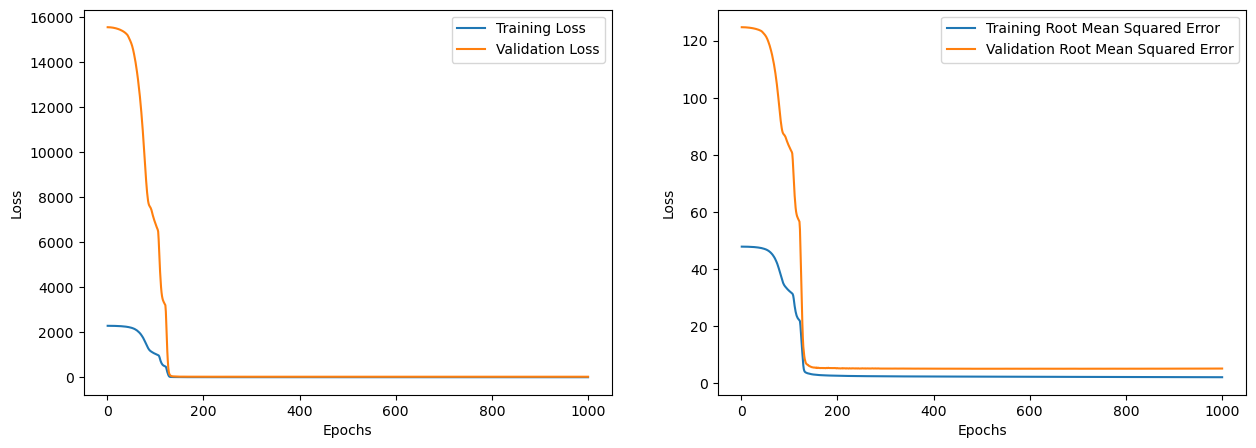

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Apple

In [22]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


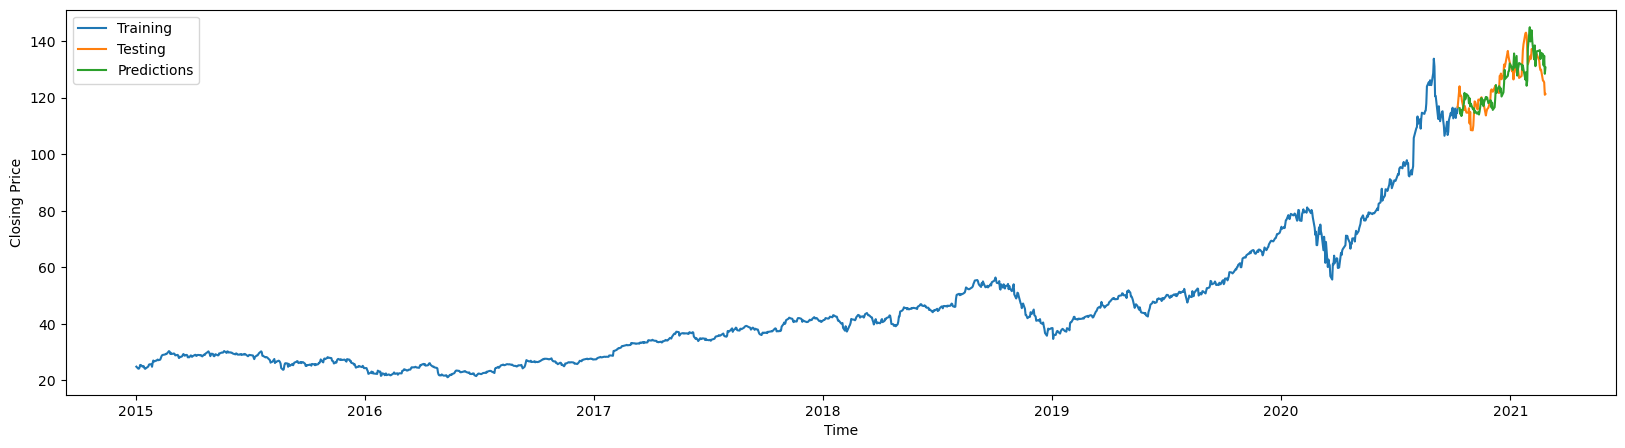

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [24]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 5.1272303269693715
MAPE: 0.031963326566601856


#Tesla

In [25]:
TSLA.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,44.57,44.65,42.65,43.86,43.86,23822000.0
1,2015-01-05,42.91,43.30,41.43,42.02,42.02,26842500.0
2,2015-01-06,42.01,42.84,40.84,42.26,42.26,31309500.0
3,2015-01-07,42.67,42.96,41.96,42.19,42.19,14842000.0
4,2015-01-08,42.56,42.76,42.00,42.12,42.12,17212500.0


In [26]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [27]:
# Change Dtype of Date column
TSLA["Date"] = pd.to_datetime(TSLA["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [28]:
TSLA_Date = '2020-10-01'
TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, TSLA_Test_Y = Dataset(TSLA, TSLA_Date)

### Model Fitting

In [29]:
TSLA_Model = Model()

In [33]:
from tensorflow.keras.metrics import RootMeanSquaredError

TSLA_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [34]:
TSLA_hist = TSLA_Model.fit(TSLA_Train_X, TSLA_Train_Y, epochs = 200, validation_data = (TSLA_Test_X, TSLA_Test_Y), callbacks=[callback])

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 9067.0166 - root_mean_squared_error: 94.8969 - val_loss: 425451.5938 - val_root_mean_squared_error: 652.2665 - learning_rate: 0.0000e+00
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11208.2764 - root_mean_squared_error: 105.4706 - val_loss: 425440.2500 - val_root_mean_squared_error: 652.2578 - learning_rate: 6.6667e-08
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9946.4492 - root_mean_squared_error: 99.5668 - val_loss: 425420.4062 - val_root_mean_squared_error: 652.2426 - learning_rate: 1.3333e-07
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9374.7441 - root_mean_squared_error: 96.5487 - val_loss: 425391.7188 - val_root_mean_squared_error: 652.2206 - learning_rate: 2.0000e-07
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10695.3682 - root_mean_squared_error: 103.2333 - val_loss: 425349.4062 - val_root_mean_squared_error: 652.1882 - learning_rate: 2.6667e-07
Epoch 6/200
9/9 ━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11577.0283 - root_mean_squared_error: 106.9063 - val_loss: 420294.1562 - val_root_mean_squared_error: 648.3010 - learning_rate: 2.3333e-06
Epoch 37/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11279.1123 - root_mean_squared_error: 105.1347 - val_loss: 419982.3750 - val_root_mean_squared_error: 648.0605 - learning_rate: 2.4000e-06
Epoch 38/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9593.0381 - root_mean_squared_error: 97.8980 - val_loss: 419676.2188 - val_root_mean_squared_error: 647.8242 - learning_rate: 2.4667e-06
Epoch 39/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8014.0122 - root_mean_squared_error: 88.8008 - val_loss: 419349.1875 - val_root_mean_squared_error: 647.5718 - learning_rate: 2.5333e-06
Epoch 40/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11219.0352 - root_mean_squared_error: 105.5932 - val_loss: 418931.4688 - val_root_mean_squared_error: 647.2491 - learning_rate: 2.6000e-06
Epoch 41/200
9/9 ━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11344.8203 - root_mean_squared_error: 105.0961 - val_loss: 366090.8125 - val_root_mean_squared_error: 605.0544 - learning_rate: 4.6667e-06
Epoch 72/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7748.8076 - root_mean_squared_error: 87.1775 - val_loss: 359925.4688 - val_root_mean_squared_error: 599.9379 - learning_rate: 4.7333e-06
Epoch 73/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8016.9482 - root_mean_squared_error: 89.4048 - val_loss: 353842.7188 - val_root_mean_squared_error: 594.8468 - learning_rate: 4.8000e-06
Epoch 74/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8505.8457 - root_mean_squared_error: 92.1825 - val_loss: 347081.9062 - val_root_mean_squared_error: 589.1366 - learning_rate: 4.8667e-06
Epoch 75/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8967.6738 - root_mean_squared_error: 94.5667 - val_loss: 340091.3125 - val_root_mean_squared_error: 583.1735 - learning_rate: 4.9333e-06
Epoch 76/200
9/9 ━━━━━━━━━━━━━━

Epoch 107/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 318.4153 - root_mean_squared_error: 17.7388 - val_loss: 7753.8823 - val_root_mean_squared_error: 88.0561 - learning_rate: 7.0667e-06
Epoch 108/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 220.4914 - root_mean_squared_error: 14.5559 - val_loss: 7019.8140 - val_root_mean_squared_error: 83.7843 - learning_rate: 7.1333e-06
Epoch 109/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 185.8876 - root_mean_squared_error: 13.4106 - val_loss: 6511.5015 - val_root_mean_squared_error: 80.6939 - learning_rate: 7.2000e-06
Epoch 110/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 226.4627 - root_mean_squared_error: 14.9646 - val_loss: 5392.8892 - val_root_mean_squared_error: 73.4363 - learning_rate: 7.2667e-06
Epoch 111/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 181.9640 - root_mean_squared_error: 13.2285 - val_loss: 5196.8691 - val_root_mean_squared_error: 72.0893 - learning_rate: 7.3333e-06
Epoch 112/200
9/9 ━━━━━━━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 107.1755 - root_mean_squared_error: 10.2732 - val_loss: 5223.8477 - val_root_mean_squared_error: 72.2762 - learning_rate: 9.4667e-06
Epoch 144/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 134.8325 - root_mean_squared_error: 11.5253 - val_loss: 5707.4487 - val_root_mean_squared_error: 75.5477 - learning_rate: 9.5333e-06
Epoch 145/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 101.7131 - root_mean_squared_error: 9.9703 - val_loss: 5758.5835 - val_root_mean_squared_error: 75.8853 - learning_rate: 9.6000e-06
Epoch 146/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 115.6203 - root_mean_squared_error: 10.7287 - val_loss: 5463.5459 - val_root_mean_squared_error: 73.9158 - learning_rate: 9.6667e-06
Epoch 147/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 80.3528 - root_mean_squared_error: 8.8953 - val_loss: 5860.7588 - val_root_mean_squared_error: 76.5556 - learning_rate: 9.7333e-06
Epoch 148/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 75.3356 - root_mean_squared_error: 8.6508 - val_loss: 7601.2798 - val_root_mean_squared_error: 87.1853 - learning_rate: 7.5578e-06
Epoch 180/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 82.6342 - root_mean_squared_error: 9.0722 - val_loss: 7581.5952 - val_root_mean_squared_error: 87.0724 - learning_rate: 7.4826e-06
Epoch 181/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.6317 - root_mean_squared_error: 8.1038 - val_loss: 7709.0073 - val_root_mean_squared_error: 87.8009 - learning_rate: 7.4082e-06
Epoch 182/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.8642 - root_mean_squared_error: 8.3698 - val_loss: 7546.0444 - val_root_mean_squared_error: 86.8680 - learning_rate: 7.3345e-06
Epoch 183/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.0309 - root_mean_squared_error: 8.8871 - val_loss: 7980.9360 - val_root_mean_squared_error: 89.3361 - learning_rate: 7.2615e-06
Epoch 184/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss:

In [35]:
history_dict = TSLA_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

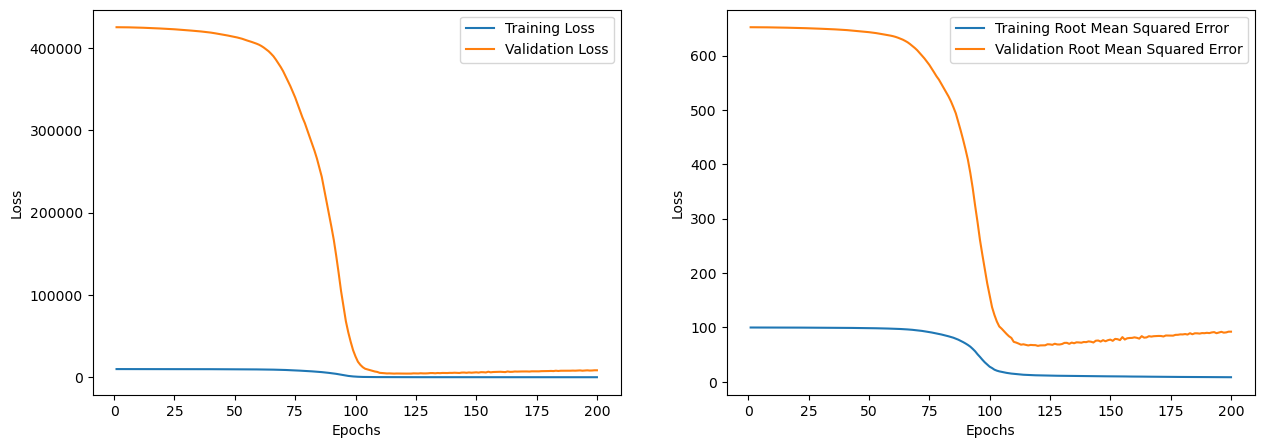

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Tesla

In [37]:
TSLA_prediction = TSLA_Model.predict(TSLA_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


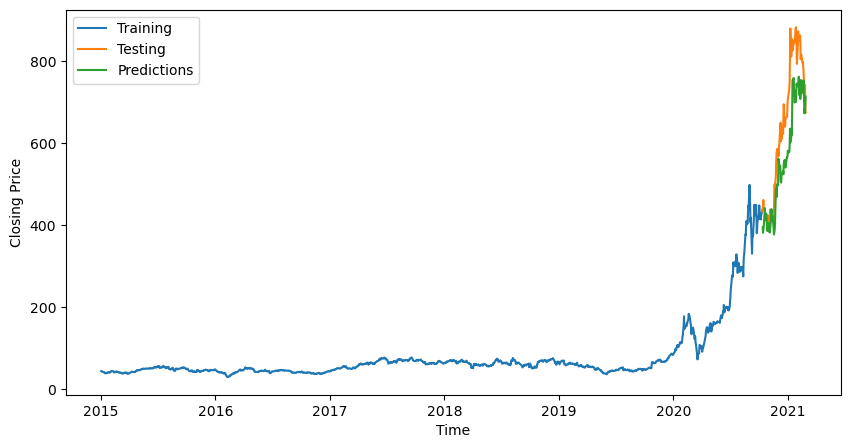

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(TSLA['Date'][TSLA['Date'] < '2020-10-12'], TSLA['Adj. Close'][TSLA['Date'] < '2020-10-12'], label = 'Training')
plt.plot(TSLA['Date'][TSLA['Date'] >= '2020-10-09'], TSLA['Adj. Close'][TSLA['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(TSLA['Date'][TSLA['Date'] >= '2020-10-12'], TSLA_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [39]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Y.reshape(-1, 5), TSLA_prediction))
mape = np.mean(np.abs(TSLA_prediction - TSLA_Test_Y.reshape(-1, 5))/np.abs(TSLA_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 92.16061928957319
MAPE: 0.10828154582753205


#Google

In [40]:
GOOG.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,527.56,529.82,522.67,523.37,523.37,1447563.0
1,2015-01-05,521.83,522.89,511.66,512.46,512.46,2059840.0
2,2015-01-06,513.59,514.76,499.68,500.59,500.59,2899940.0
3,2015-01-07,505.61,505.86,498.28,499.73,499.73,2065054.0
4,2015-01-08,496.63,502.10,489.66,501.30,501.30,3353582.0


In [41]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [42]:
# Change Dtype of Date column
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [43]:
GOOG_Date = '2020-11-01'
GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(GOOG, GOOG_Date)

### Model Fitting

In [44]:
GOOG_Model = Model()

In [46]:
from tensorflow.keras.metrics import RootMeanSquaredError

GOOG_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [47]:
GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 1000, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks = [callback])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1063533.7500 - root_mean_squared_error: 1031.2339 - val_loss: 3416025.0000 - val_root_mean_squared_error: 1848.2491 - learning_rate: 0.0000e+00
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 969808.7500 - root_mean_squared_error: 984.2276 - val_loss: 3415884.7500 - val_root_mean_squared_error: 1848.2112 - learning_rate: 6.6667e-08
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1021232.1875 - root_mean_squared_error: 1010.4500 - val_loss: 3415600.0000 - val_root_mean_squared_error: 1848.1342 - learning_rate: 1.3333e-07
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1053402.6250 - root_mean_squared_error: 1026.2648 - val_loss: 3415181.2500 - val_root_mean_squared_error: 1848.0209 - learning_rate: 2.0000e-07
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 980478.5000 - root_mean_squared_error: 989.7791 - val_loss: 3414657.0000 - val_root_mean_squared_error: 1847.8790 - learn

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1064247.2500 - root_mean_squared_error: 1031.3684 - val_loss: 3331411.5000 - val_root_mean_squared_error: 1825.2155 - learning_rate: 2.2667e-06
Epoch 36/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1005487.2500 - root_mean_squared_error: 1002.7016 - val_loss: 3325116.2500 - val_root_mean_squared_error: 1823.4901 - learning_rate: 2.3333e-06
Epoch 37/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 997569.8750 - root_mean_squared_error: 998.7535 - val_loss: 3317046.5000 - val_root_mean_squared_error: 1821.2761 - learning_rate: 2.4000e-06
Epoch 38/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 991845.8125 - root_mean_squared_error: 995.7943 - val_loss: 3306864.7500 - val_root_mean_squared_error: 1818.4786 - learning_rate: 2.4667e-06
Epoch 39/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 962226.8125 - root_mean_squared_error: 980.6902 - val_loss: 3296861.7500 - val_root_mean_squared_error: 1815.7262 - learning_rate: 2

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 905093.3125 - root_mean_squared_error: 950.8582 - val_loss: 2809656.7500 - val_root_mean_squared_error: 1676.2031 - learning_rate: 4.5333e-06
Epoch 70/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 832823.7500 - root_mean_squared_error: 912.3818 - val_loss: 2778787.2500 - val_root_mean_squared_error: 1666.9695 - learning_rate: 4.6000e-06
Epoch 71/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 879345.4375 - root_mean_squared_error: 937.4990 - val_loss: 2738936.5000 - val_root_mean_squared_error: 1654.9733 - learning_rate: 4.6667e-06
Epoch 72/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 824585.6875 - root_mean_squared_error: 908.0618 - val_loss: 2697551.0000 - val_root_mean_squared_error: 1642.4222 - learning_rate: 4.7333e-06
Epoch 73/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 818416.6250 - root_mean_squared_error: 904.6486 - val_loss: 2654565.7500 - val_root_mean_squared_error: 1629.2838 - learning_rate: 4.800

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 225137.2812 - root_mean_squared_error: 474.4641 - val_loss: 738976.3750 - val_root_mean_squared_error: 859.6373 - learning_rate: 6.8000e-06
Epoch 104/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 226933.2500 - root_mean_squared_error: 476.3401 - val_loss: 728493.6875 - val_root_mean_squared_error: 853.5184 - learning_rate: 6.8667e-06
Epoch 105/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 220386.7188 - root_mean_squared_error: 469.4164 - val_loss: 719335.7500 - val_root_mean_squared_error: 848.1367 - learning_rate: 6.9333e-06
Epoch 106/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 212567.2656 - root_mean_squared_error: 461.0129 - val_loss: 668689.1875 - val_root_mean_squared_error: 817.7342 - learning_rate: 7.0000e-06
Epoch 107/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 197311.0312 - root_mean_squared_error: 444.0828 - val_loss: 587966.9375 - val_root_mean_squared_error: 766.7900 - learning_rate: 7.0667e-06


Epoch 138/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1129.3038 - root_mean_squared_error: 33.5631 - val_loss: 3957.1714 - val_root_mean_squared_error: 62.9061 - learning_rate: 9.1333e-06
Epoch 139/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 812.9562 - root_mean_squared_error: 28.4010 - val_loss: 3925.1084 - val_root_mean_squared_error: 62.6507 - learning_rate: 9.2000e-06
Epoch 140/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 928.0951 - root_mean_squared_error: 30.4298 - val_loss: 3814.1450 - val_root_mean_squared_error: 61.7588 - learning_rate: 9.2667e-06
Epoch 141/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 968.3957 - root_mean_squared_error: 31.0794 - val_loss: 3740.0608 - val_root_mean_squared_error: 61.1560 - learning_rate: 9.3333e-06
Epoch 142/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 885.2143 - root_mean_squared_error: 29.7182 - val_loss: 3477.8511 - val_root_mean_squared_error: 58.9733 - learning_rate: 9.4000e-06
Epoch 143/1000
10/1

Epoch 174/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 757.5974 - root_mean_squared_error: 27.5083 - val_loss: 3470.1694 - val_root_mean_squared_error: 58.9081 - learning_rate: 7.9453e-06
Epoch 175/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 767.1299 - root_mean_squared_error: 27.6557 - val_loss: 3401.2678 - val_root_mean_squared_error: 58.3204 - learning_rate: 7.8663e-06
Epoch 176/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 714.5786 - root_mean_squared_error: 26.7198 - val_loss: 3377.9033 - val_root_mean_squared_error: 58.1197 - learning_rate: 7.7880e-06
Epoch 177/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 715.7287 - root_mean_squared_error: 26.7455 - val_loss: 3447.8684 - val_root_mean_squared_error: 58.7186 - learning_rate: 7.7105e-06
Epoch 178/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 700.5798 - root_mean_squared_error: 26.4328 - val_loss: 3451.6680 - val_root_mean_squared_error: 58.7509 - learning_rate: 7.6338e-06
Epoch 179/1000
10/10

Epoch 210/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 721.4556 - root_mean_squared_error: 26.8513 - val_loss: 3520.1841 - val_root_mean_squared_error: 59.3311 - learning_rate: 5.5433e-06
Epoch 211/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 666.4533 - root_mean_squared_error: 25.7981 - val_loss: 3514.0369 - val_root_mean_squared_error: 59.2793 - learning_rate: 5.4881e-06
Epoch 212/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 690.7638 - root_mean_squared_error: 26.2526 - val_loss: 3357.2969 - val_root_mean_squared_error: 57.9422 - learning_rate: 5.4335e-06
Epoch 213/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 696.2658 - root_mean_squared_error: 26.3844 - val_loss: 3342.0425 - val_root_mean_squared_error: 57.8104 - learning_rate: 5.3794e-06
Epoch 214/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 696.8391 - root_mean_squared_error: 26.3246 - val_loss: 3439.7537 - val_root_mean_squared_error: 58.6494 - learning_rate: 5.3259e-06
Epoch 215/1000
10/10

Epoch 246/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 682.2609 - root_mean_squared_error: 26.0879 - val_loss: 3747.8892 - val_root_mean_squared_error: 61.2200 - learning_rate: 3.8674e-06
Epoch 247/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 735.3997 - root_mean_squared_error: 27.0750 - val_loss: 4232.3032 - val_root_mean_squared_error: 65.0562 - learning_rate: 3.8289e-06
Epoch 248/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 718.6593 - root_mean_squared_error: 26.7982 - val_loss: 3385.9907 - val_root_mean_squared_error: 58.1893 - learning_rate: 3.7908e-06
Epoch 249/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 719.2499 - root_mean_squared_error: 26.8092 - val_loss: 3531.7219 - val_root_mean_squared_error: 59.4283 - learning_rate: 3.7531e-06
Epoch 250/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 619.0998 - root_mean_squared_error: 24.8583 - val_loss: 3307.4368 - val_root_mean_squared_error: 57.5103 - learning_rate: 3.7158e-06
Epoch 251/1000
10/10

Epoch 282/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 687.8406 - root_mean_squared_error: 26.1995 - val_loss: 3572.7664 - val_root_mean_squared_error: 59.7726 - learning_rate: 2.6982e-06
Epoch 283/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 719.7786 - root_mean_squared_error: 26.7752 - val_loss: 3514.8232 - val_root_mean_squared_error: 59.2859 - learning_rate: 2.6714e-06
Epoch 284/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 605.6787 - root_mean_squared_error: 24.5059 - val_loss: 3525.6829 - val_root_mean_squared_error: 59.3775 - learning_rate: 2.6448e-06
Epoch 285/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 634.1943 - root_mean_squared_error: 25.1287 - val_loss: 3393.2417 - val_root_mean_squared_error: 58.2515 - learning_rate: 2.6185e-06
Epoch 286/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 632.8436 - root_mean_squared_error: 25.1209 - val_loss: 3459.1008 - val_root_mean_squared_error: 58.8141 - learning_rate: 2.5924e-06
Epoch 287/1000
10/10

Epoch 318/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 666.8678 - root_mean_squared_error: 25.8209 - val_loss: 3584.5613 - val_root_mean_squared_error: 59.8712 - learning_rate: 1.8825e-06
Epoch 319/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 603.7310 - root_mean_squared_error: 24.5094 - val_loss: 3547.4832 - val_root_mean_squared_error: 59.5608 - learning_rate: 1.8637e-06
Epoch 320/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 647.2964 - root_mean_squared_error: 25.4399 - val_loss: 3547.6577 - val_root_mean_squared_error: 59.5622 - learning_rate: 1.8452e-06
Epoch 321/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 624.8905 - root_mean_squared_error: 24.9620 - val_loss: 3524.6067 - val_root_mean_squared_error: 59.3684 - learning_rate: 1.8268e-06
Epoch 322/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 621.9406 - root_mean_squared_error: 24.8834 - val_loss: 3558.9490 - val_root_mean_squared_error: 59.6569 - learning_rate: 1.8087e-06
Epoch 323/1000
10/10

Epoch 354/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 623.3290 - root_mean_squared_error: 24.9312 - val_loss: 3678.9172 - val_root_mean_squared_error: 60.6541 - learning_rate: 1.3134e-06
Epoch 355/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 652.7842 - root_mean_squared_error: 25.5435 - val_loss: 3582.0806 - val_root_mean_squared_error: 59.8505 - learning_rate: 1.3003e-06
Epoch 356/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 683.2545 - root_mean_squared_error: 26.1011 - val_loss: 3589.2158 - val_root_mean_squared_error: 59.9101 - learning_rate: 1.2873e-06
Epoch 357/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 681.5479 - root_mean_squared_error: 26.0768 - val_loss: 3566.6824 - val_root_mean_squared_error: 59.7217 - learning_rate: 1.2745e-06
Epoch 358/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 665.3922 - root_mean_squared_error: 25.7832 - val_loss: 3639.9775 - val_root_mean_squared_error: 60.3322 - learning_rate: 1.2619e-06
Epoch 359/1000
10/10

Epoch 390/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 617.7792 - root_mean_squared_error: 24.8297 - val_loss: 3613.0693 - val_root_mean_squared_error: 60.1088 - learning_rate: 9.1630e-07
Epoch 391/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 682.0566 - root_mean_squared_error: 26.1003 - val_loss: 3632.9924 - val_root_mean_squared_error: 60.2743 - learning_rate: 9.0718e-07
Epoch 392/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 614.9388 - root_mean_squared_error: 24.7904 - val_loss: 3644.9214 - val_root_mean_squared_error: 60.3732 - learning_rate: 8.9815e-07
Epoch 393/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 731.5328 - root_mean_squared_error: 26.9951 - val_loss: 3683.0266 - val_root_mean_squared_error: 60.6879 - learning_rate: 8.8922e-07
Epoch 394/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 677.1667 - root_mean_squared_error: 26.0052 - val_loss: 3594.0510 - val_root_mean_squared_error: 59.9504 - learning_rate: 8.8037e-07
Epoch 395/1000
10/10

Epoch 426/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 696.9277 - root_mean_squared_error: 26.3464 - val_loss: 3819.2903 - val_root_mean_squared_error: 61.8004 - learning_rate: 1.0000e-06
Epoch 427/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 555.0580 - root_mean_squared_error: 23.4285 - val_loss: 3664.9524 - val_root_mean_squared_error: 60.5388 - learning_rate: 1.0000e-06
Epoch 428/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 629.2578 - root_mean_squared_error: 25.0790 - val_loss: 3496.9546 - val_root_mean_squared_error: 59.1351 - learning_rate: 1.0000e-06
Epoch 429/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 669.2397 - root_mean_squared_error: 25.8528 - val_loss: 3538.9006 - val_root_mean_squared_error: 59.4887 - learning_rate: 1.0000e-06
Epoch 430/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 698.1047 - root_mean_squared_error: 26.3988 - val_loss: 3563.5129 - val_root_mean_squared_error: 59.6952 - learning_rate: 1.0000e-06
Epoch 431/1000
10/10

Epoch 462/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 708.6426 - root_mean_squared_error: 26.5591 - val_loss: 3543.8630 - val_root_mean_squared_error: 59.5304 - learning_rate: 1.0000e-06
Epoch 463/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 605.3108 - root_mean_squared_error: 24.5778 - val_loss: 3416.4568 - val_root_mean_squared_error: 58.4505 - learning_rate: 1.0000e-06
Epoch 464/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 654.9368 - root_mean_squared_error: 25.5763 - val_loss: 3475.2341 - val_root_mean_squared_error: 58.9511 - learning_rate: 1.0000e-06
Epoch 465/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 688.3831 - root_mean_squared_error: 26.2112 - val_loss: 3568.4719 - val_root_mean_squared_error: 59.7367 - learning_rate: 1.0000e-06
Epoch 466/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 618.7285 - root_mean_squared_error: 24.8374 - val_loss: 3486.7292 - val_root_mean_squared_error: 59.0485 - learning_rate: 1.0000e-06
Epoch 467/1000
10/10

Epoch 498/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 651.8625 - root_mean_squared_error: 25.5112 - val_loss: 3382.7144 - val_root_mean_squared_error: 58.1611 - learning_rate: 1.0000e-06
Epoch 499/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 619.7421 - root_mean_squared_error: 24.8822 - val_loss: 3488.4929 - val_root_mean_squared_error: 59.0635 - learning_rate: 1.0000e-06
Epoch 500/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 612.1626 - root_mean_squared_error: 24.6950 - val_loss: 3336.9382 - val_root_mean_squared_error: 57.7662 - learning_rate: 1.0000e-06
Epoch 501/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 576.9153 - root_mean_squared_error: 23.9507 - val_loss: 3336.0698 - val_root_mean_squared_error: 57.7587 - learning_rate: 1.0000e-06
Epoch 502/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 624.1052 - root_mean_squared_error: 24.9386 - val_loss: 3342.2458 - val_root_mean_squared_error: 57.8122 - learning_rate: 1.0000e-06
Epoch 503/1000
10/10

Epoch 534/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 657.6547 - root_mean_squared_error: 25.5966 - val_loss: 3499.3931 - val_root_mean_squared_error: 59.1557 - learning_rate: 1.0000e-06
Epoch 535/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 590.3021 - root_mean_squared_error: 24.2875 - val_loss: 3520.3416 - val_root_mean_squared_error: 59.3325 - learning_rate: 1.0000e-06
Epoch 536/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 573.8638 - root_mean_squared_error: 23.8405 - val_loss: 3653.0674 - val_root_mean_squared_error: 60.4406 - learning_rate: 1.0000e-06
Epoch 537/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 588.6702 - root_mean_squared_error: 24.2317 - val_loss: 3589.7703 - val_root_mean_squared_error: 59.9147 - learning_rate: 1.0000e-06
Epoch 538/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 644.8650 - root_mean_squared_error: 25.3803 - val_loss: 3592.2263 - val_root_mean_squared_error: 59.9352 - learning_rate: 1.0000e-06
Epoch 539/1000
10/10

Epoch 570/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 611.0581 - root_mean_squared_error: 24.7124 - val_loss: 3426.1812 - val_root_mean_squared_error: 58.5336 - learning_rate: 1.0000e-06
Epoch 571/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 673.3802 - root_mean_squared_error: 25.9397 - val_loss: 3422.8149 - val_root_mean_squared_error: 58.5048 - learning_rate: 1.0000e-06
Epoch 572/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 585.8517 - root_mean_squared_error: 24.1772 - val_loss: 3385.5542 - val_root_mean_squared_error: 58.1855 - learning_rate: 1.0000e-06
Epoch 573/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 652.8541 - root_mean_squared_error: 25.5291 - val_loss: 3382.4656 - val_root_mean_squared_error: 58.1590 - learning_rate: 1.0000e-06
Epoch 574/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 698.2127 - root_mean_squared_error: 26.3742 - val_loss: 3436.3850 - val_root_mean_squared_error: 58.6207 - learning_rate: 1.0000e-06
Epoch 575/1000
10/10

Epoch 606/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 590.0401 - root_mean_squared_error: 24.2692 - val_loss: 3570.1990 - val_root_mean_squared_error: 59.7511 - learning_rate: 1.0000e-06
Epoch 607/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 597.3965 - root_mean_squared_error: 24.4189 - val_loss: 3504.6033 - val_root_mean_squared_error: 59.1997 - learning_rate: 1.0000e-06
Epoch 608/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 593.6580 - root_mean_squared_error: 24.3378 - val_loss: 3466.5469 - val_root_mean_squared_error: 58.8774 - learning_rate: 1.0000e-06
Epoch 609/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 638.2232 - root_mean_squared_error: 25.2501 - val_loss: 3586.0173 - val_root_mean_squared_error: 59.8834 - learning_rate: 1.0000e-06
Epoch 610/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 612.6861 - root_mean_squared_error: 24.7415 - val_loss: 3467.6719 - val_root_mean_squared_error: 58.8869 - learning_rate: 1.0000e-06
Epoch 611/1000
10/10

Epoch 642/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 655.4224 - root_mean_squared_error: 25.5839 - val_loss: 3555.3760 - val_root_mean_squared_error: 59.6270 - learning_rate: 1.0000e-06
Epoch 643/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 594.9893 - root_mean_squared_error: 24.3831 - val_loss: 3640.3530 - val_root_mean_squared_error: 60.3353 - learning_rate: 1.0000e-06
Epoch 644/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 708.2222 - root_mean_squared_error: 26.5656 - val_loss: 3639.8777 - val_root_mean_squared_error: 60.3314 - learning_rate: 1.0000e-06
Epoch 645/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 627.8425 - root_mean_squared_error: 25.0527 - val_loss: 3504.6338 - val_root_mean_squared_error: 59.1999 - learning_rate: 1.0000e-06
Epoch 646/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 604.9028 - root_mean_squared_error: 24.5811 - val_loss: 3585.7739 - val_root_mean_squared_error: 59.8813 - learning_rate: 1.0000e-06
Epoch 647/1000
10/10

Epoch 678/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 618.4839 - root_mean_squared_error: 24.8657 - val_loss: 3672.9146 - val_root_mean_squared_error: 60.6046 - learning_rate: 1.0000e-06
Epoch 679/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 603.0295 - root_mean_squared_error: 24.5458 - val_loss: 3606.5891 - val_root_mean_squared_error: 60.0549 - learning_rate: 1.0000e-06
Epoch 680/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 566.0089 - root_mean_squared_error: 23.6947 - val_loss: 3521.2036 - val_root_mean_squared_error: 59.3397 - learning_rate: 1.0000e-06
Epoch 681/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 556.1453 - root_mean_squared_error: 23.4824 - val_loss: 3611.0110 - val_root_mean_squared_error: 60.0917 - learning_rate: 1.0000e-06
Epoch 682/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 620.8365 - root_mean_squared_error: 24.8811 - val_loss: 3596.8557 - val_root_mean_squared_error: 59.9738 - learning_rate: 1.0000e-06
Epoch 683/1000
10/10

Epoch 714/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 595.8619 - root_mean_squared_error: 24.3589 - val_loss: 3681.0269 - val_root_mean_squared_error: 60.6715 - learning_rate: 1.0000e-06
Epoch 715/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 624.2369 - root_mean_squared_error: 24.9789 - val_loss: 3569.1821 - val_root_mean_squared_error: 59.7426 - learning_rate: 1.0000e-06
Epoch 716/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 622.3160 - root_mean_squared_error: 24.8791 - val_loss: 3740.0652 - val_root_mean_squared_error: 61.1561 - learning_rate: 1.0000e-06
Epoch 717/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 667.1496 - root_mean_squared_error: 25.7948 - val_loss: 3602.2000 - val_root_mean_squared_error: 60.0183 - learning_rate: 1.0000e-06
Epoch 718/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 637.8914 - root_mean_squared_error: 25.2453 - val_loss: 3648.6853 - val_root_mean_squared_error: 60.4044 - learning_rate: 1.0000e-06
Epoch 719/1000
10/10

Epoch 750/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 623.5881 - root_mean_squared_error: 24.9653 - val_loss: 3682.6245 - val_root_mean_squared_error: 60.6846 - learning_rate: 1.0000e-06
Epoch 751/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 603.0848 - root_mean_squared_error: 24.5283 - val_loss: 3694.8828 - val_root_mean_squared_error: 60.7855 - learning_rate: 1.0000e-06
Epoch 752/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 660.9047 - root_mean_squared_error: 25.6665 - val_loss: 3797.7578 - val_root_mean_squared_error: 61.6259 - learning_rate: 1.0000e-06
Epoch 753/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 647.6230 - root_mean_squared_error: 25.4130 - val_loss: 3754.5239 - val_root_mean_squared_error: 61.2742 - learning_rate: 1.0000e-06
Epoch 754/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 625.5527 - root_mean_squared_error: 24.9915 - val_loss: 3745.7878 - val_root_mean_squared_error: 61.2028 - learning_rate: 1.0000e-06
Epoch 755/1000
10/10

Epoch 786/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 729.0353 - root_mean_squared_error: 26.8808 - val_loss: 3953.4248 - val_root_mean_squared_error: 62.8763 - learning_rate: 1.0000e-06
Epoch 787/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 641.3353 - root_mean_squared_error: 25.3183 - val_loss: 4123.5718 - val_root_mean_squared_error: 64.2150 - learning_rate: 1.0000e-06
Epoch 788/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 644.0469 - root_mean_squared_error: 25.3509 - val_loss: 3767.6406 - val_root_mean_squared_error: 61.3811 - learning_rate: 1.0000e-06
Epoch 789/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 662.4577 - root_mean_squared_error: 25.7012 - val_loss: 3885.6086 - val_root_mean_squared_error: 62.3347 - learning_rate: 1.0000e-06
Epoch 790/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 642.6866 - root_mean_squared_error: 25.3255 - val_loss: 3989.7214 - val_root_mean_squared_error: 63.1642 - learning_rate: 1.0000e-06
Epoch 791/1000
10/10

Epoch 822/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 585.4161 - root_mean_squared_error: 24.1856 - val_loss: 4276.9087 - val_root_mean_squared_error: 65.3981 - learning_rate: 1.0000e-06
Epoch 823/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 584.9346 - root_mean_squared_error: 24.1761 - val_loss: 4081.8271 - val_root_mean_squared_error: 63.8892 - learning_rate: 1.0000e-06
Epoch 824/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 559.8707 - root_mean_squared_error: 23.6429 - val_loss: 3975.9089 - val_root_mean_squared_error: 63.0548 - learning_rate: 1.0000e-06
Epoch 825/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 641.1943 - root_mean_squared_error: 25.2967 - val_loss: 3749.8440 - val_root_mean_squared_error: 61.2360 - learning_rate: 1.0000e-06
Epoch 826/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 641.1016 - root_mean_squared_error: 25.2658 - val_loss: 4019.2354 - val_root_mean_squared_error: 63.3974 - learning_rate: 1.0000e-06
Epoch 827/1000
10/10

Epoch 858/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 615.1877 - root_mean_squared_error: 24.7893 - val_loss: 4280.6982 - val_root_mean_squared_error: 65.4270 - learning_rate: 1.0000e-06
Epoch 859/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 666.9035 - root_mean_squared_error: 25.8000 - val_loss: 4144.0850 - val_root_mean_squared_error: 64.3746 - learning_rate: 1.0000e-06
Epoch 860/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 672.4250 - root_mean_squared_error: 25.8448 - val_loss: 4255.6948 - val_root_mean_squared_error: 65.2357 - learning_rate: 1.0000e-06
Epoch 861/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 643.9855 - root_mean_squared_error: 25.3672 - val_loss: 4379.4839 - val_root_mean_squared_error: 66.1777 - learning_rate: 1.0000e-06
Epoch 862/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 548.2809 - root_mean_squared_error: 23.3705 - val_loss: 4068.8958 - val_root_mean_squared_error: 63.7879 - learning_rate: 1.0000e-06
Epoch 863/1000
10/10

Epoch 894/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 583.0360 - root_mean_squared_error: 24.1382 - val_loss: 4438.2163 - val_root_mean_squared_error: 66.6199 - learning_rate: 1.0000e-06
Epoch 895/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 574.9114 - root_mean_squared_error: 23.9704 - val_loss: 4324.6865 - val_root_mean_squared_error: 65.7624 - learning_rate: 1.0000e-06
Epoch 896/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 606.0668 - root_mean_squared_error: 24.6007 - val_loss: 4462.0532 - val_root_mean_squared_error: 66.7986 - learning_rate: 1.0000e-06
Epoch 897/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 601.8799 - root_mean_squared_error: 24.5072 - val_loss: 4528.2139 - val_root_mean_squared_error: 67.2920 - learning_rate: 1.0000e-06
Epoch 898/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 569.3273 - root_mean_squared_error: 23.8484 - val_loss: 4306.5762 - val_root_mean_squared_error: 65.6245 - learning_rate: 1.0000e-06
Epoch 899/1000
10/10

Epoch 930/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 613.0632 - root_mean_squared_error: 24.7524 - val_loss: 4856.4951 - val_root_mean_squared_error: 69.6886 - learning_rate: 1.0000e-06
Epoch 931/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 644.5471 - root_mean_squared_error: 25.3652 - val_loss: 5164.5054 - val_root_mean_squared_error: 71.8645 - learning_rate: 1.0000e-06
Epoch 932/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 659.7000 - root_mean_squared_error: 25.6414 - val_loss: 5453.7388 - val_root_mean_squared_error: 73.8494 - learning_rate: 1.0000e-06
Epoch 933/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 620.3407 - root_mean_squared_error: 24.9021 - val_loss: 4441.0479 - val_root_mean_squared_error: 66.6412 - learning_rate: 1.0000e-06
Epoch 934/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 667.2699 - root_mean_squared_error: 25.7998 - val_loss: 5283.1616 - val_root_mean_squared_error: 72.6854 - learning_rate: 1.0000e-06
Epoch 935/1000
10/10

Epoch 966/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 603.4862 - root_mean_squared_error: 24.5563 - val_loss: 5435.4697 - val_root_mean_squared_error: 73.7256 - learning_rate: 1.0000e-06
Epoch 967/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 591.8099 - root_mean_squared_error: 24.3181 - val_loss: 5380.0967 - val_root_mean_squared_error: 73.3491 - learning_rate: 1.0000e-06
Epoch 968/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 628.6243 - root_mean_squared_error: 25.0569 - val_loss: 5476.0288 - val_root_mean_squared_error: 74.0002 - learning_rate: 1.0000e-06
Epoch 969/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 616.6520 - root_mean_squared_error: 24.8293 - val_loss: 5338.2026 - val_root_mean_squared_error: 73.0630 - learning_rate: 1.0000e-06
Epoch 970/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 630.3470 - root_mean_squared_error: 25.0892 - val_loss: 5515.1392 - val_root_mean_squared_error: 74.2640 - learning_rate: 1.0000e-06
Epoch 971/1000
10/10

In [50]:
history_dict = GOOG_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

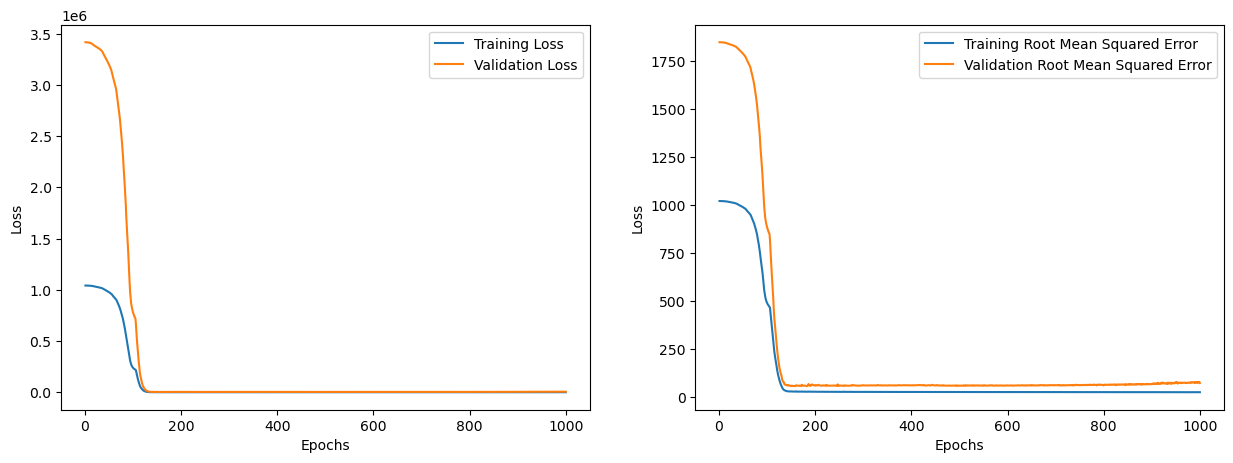

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Google

In [52]:
GOOG_prediction = GOOG_Model.predict(GOOG_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


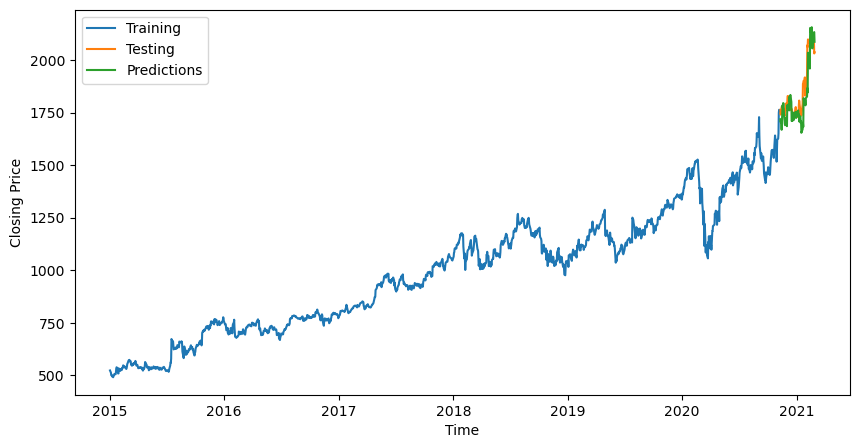

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(GOOG['Date'][GOOG['Date'] < '2020-11-07'], GOOG['Adj. Close'][GOOG['Date'] < '2020-11-07'], label = 'Training')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG['Adj. Close'][GOOG['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [54]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 72.55313917731253
MAPE: 0.02939768398385195


# Microsoft

In [55]:
MSFT.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,46.66,47.42,46.54,46.76,41.44,27913900.0
1,2015-01-05,46.37,46.73,46.25,46.33,41.06,39673900.0
2,2015-01-06,46.38,46.75,45.54,45.65,40.46,36447900.0
3,2015-01-07,45.98,46.46,45.49,46.23,40.97,29114100.0
4,2015-01-08,46.75,47.75,46.72,47.59,42.18,29645200.0


In [56]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [57]:
# Change Dtype of Date column
MSFT["Date"] = pd.to_datetime(MSFT["Date"])

### Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [58]:
MSFT_Date = '2020-10-01'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT, MSFT_Date)

### Model Fitting

In [59]:
MSFT_Model = Model()

In [61]:
from tensorflow.keras.metrics import RootMeanSquaredError

MSFT_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [62]:
MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 1000, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 10360.8418 - root_mean_squared_error: 101.7150 - val_loss: 48746.8867 - val_root_mean_squared_error: 220.7870 - learning_rate: 0.0000e+00
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10695.0352 - root_mean_squared_error: 103.4153 - val_loss: 48745.9023 - val_root_mean_squared_error: 220.7847 - learning_rate: 6.6667e-08
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11170.0518 - root_mean_squared_error: 105.6346 - val_loss: 48743.9414 - val_root_mean_squared_error: 220.7803 - learning_rate: 1.3333e-07
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10323.1328 - root_mean_squared_error: 101.5732 - val_loss: 48741.0469 - val_root_mean_squared_error: 220.7737 - learning_rate: 2.0000e-07
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9852.1484 - root_mean_squared_error: 99.1880 - val_loss: 48737.2070 - val_root_mean_squared_error: 220.7650 - learning_rate: 2.6667e-07
Epoch 6/1000
9/9 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9889.1104 - root_mean_squared_error: 99.4210 - val_loss: 47666.7031 - val_root_mean_squared_error: 218.3271 - learning_rate: 2.3333e-06
Epoch 37/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10964.4082 - root_mean_squared_error: 104.5580 - val_loss: 47583.5430 - val_root_mean_squared_error: 218.1365 - learning_rate: 2.4000e-06
Epoch 38/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10806.7793 - root_mean_squared_error: 103.9198 - val_loss: 47499.3828 - val_root_mean_squared_error: 217.9435 - learning_rate: 2.4667e-06
Epoch 39/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10929.1572 - root_mean_squared_error: 104.5060 - val_loss: 47414.1406 - val_root_mean_squared_error: 217.7479 - learning_rate: 2.5333e-06
Epoch 40/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10821.1084 - root_mean_squared_error: 103.9986 - val_loss: 47328.6992 - val_root_mean_squared_error: 217.5516 - learning_rate: 2.6000e-06
Epoch 41/1000
9/9 ━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10358.2441 - root_mean_squared_error: 101.5352 - val_loss: 41609.7852 - val_root_mean_squared_error: 203.9848 - learning_rate: 4.6667e-06
Epoch 72/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8878.6318 - root_mean_squared_error: 94.2000 - val_loss: 41201.9883 - val_root_mean_squared_error: 202.9827 - learning_rate: 4.7333e-06
Epoch 73/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9116.4189 - root_mean_squared_error: 95.4555 - val_loss: 40755.7969 - val_root_mean_squared_error: 201.8806 - learning_rate: 4.8000e-06
Epoch 74/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8502.1240 - root_mean_squared_error: 92.1779 - val_loss: 40295.8359 - val_root_mean_squared_error: 200.7382 - learning_rate: 4.8667e-06
Epoch 75/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9739.1240 - root_mean_squared_error: 98.5973 - val_loss: 39777.5625 - val_root_mean_squared_error: 199.4431 - learning_rate: 4.9333e-06
Epoch 76/1000
9/9 ━━━━━━━━━━━━━━

Epoch 107/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 188.8445 - root_mean_squared_error: 13.7315 - val_loss: 450.8936 - val_root_mean_squared_error: 21.2343 - learning_rate: 7.0667e-06
Epoch 108/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 118.1931 - root_mean_squared_error: 10.8618 - val_loss: 261.0072 - val_root_mean_squared_error: 16.1557 - learning_rate: 7.1333e-06
Epoch 109/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72.4762 - root_mean_squared_error: 8.4990 - val_loss: 176.4042 - val_root_mean_squared_error: 13.2817 - learning_rate: 7.2000e-06
Epoch 110/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 47.9799 - root_mean_squared_error: 6.9231 - val_loss: 134.4743 - val_root_mean_squared_error: 11.5963 - learning_rate: 7.2667e-06
Epoch 111/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.9936 - root_mean_squared_error: 6.0779 - val_loss: 108.2243 - val_root_mean_squared_error: 10.4031 - learning_rate: 7.3333e-06
Epoch 112/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

Epoch 144/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.8057 - root_mean_squared_error: 3.9560 - val_loss: 55.9307 - val_root_mean_squared_error: 7.4787 - learning_rate: 9.5333e-06
Epoch 145/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.5010 - root_mean_squared_error: 4.0452 - val_loss: 57.1739 - val_root_mean_squared_error: 7.5613 - learning_rate: 9.6000e-06
Epoch 146/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 16.6764 - root_mean_squared_error: 4.0508 - val_loss: 56.5893 - val_root_mean_squared_error: 7.5226 - learning_rate: 9.6667e-06
Epoch 147/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.6902 - root_mean_squared_error: 4.0679 - val_loss: 56.2505 - val_root_mean_squared_error: 7.5000 - learning_rate: 9.7333e-06
Epoch 148/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.7329 - root_mean_squared_error: 3.9211 - val_loss: 55.8846 - val_root_mean_squared_error: 7.4756 - learning_rate: 9.8000e-06
Epoch 149/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - 

Epoch 181/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.4515 - root_mean_squared_error: 3.5130 - val_loss: 49.8795 - val_root_mean_squared_error: 7.0625 - learning_rate: 7.4082e-06
Epoch 182/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.1852 - root_mean_squared_error: 3.6007 - val_loss: 49.7765 - val_root_mean_squared_error: 7.0552 - learning_rate: 7.3345e-06
Epoch 183/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.1862 - root_mean_squared_error: 4.1414 - val_loss: 49.1614 - val_root_mean_squared_error: 7.0115 - learning_rate: 7.2615e-06
Epoch 184/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.2178 - root_mean_squared_error: 3.4520 - val_loss: 49.2442 - val_root_mean_squared_error: 7.0174 - learning_rate: 7.1892e-06
Epoch 185/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.3557 - root_mean_squared_error: 4.0420 - val_loss: 49.8240 - val_root_mean_squared_error: 7.0586 - learning_rate: 7.1177e-06
Epoch 186/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - 

Epoch 218/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.8991 - root_mean_squared_error: 4.1008 - val_loss: 44.8919 - val_root_mean_squared_error: 6.7001 - learning_rate: 5.1171e-06
Epoch 219/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.2310 - root_mean_squared_error: 3.8834 - val_loss: 44.6772 - val_root_mean_squared_error: 6.6841 - learning_rate: 5.0662e-06
Epoch 220/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.2899 - root_mean_squared_error: 3.8978 - val_loss: 44.3208 - val_root_mean_squared_error: 6.6574 - learning_rate: 5.0158e-06
Epoch 221/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.9343 - root_mean_squared_error: 4.1033 - val_loss: 44.2444 - val_root_mean_squared_error: 6.6516 - learning_rate: 4.9659e-06
Epoch 222/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.7306 - root_mean_squared_error: 3.8334 - val_loss: 44.6470 - val_root_mean_squared_error: 6.6818 - learning_rate: 4.9164e-06
Epoch 223/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

Epoch 255/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.8409 - root_mean_squared_error: 3.5748 - val_loss: 40.8879 - val_root_mean_squared_error: 6.3944 - learning_rate: 3.5345e-06
Epoch 256/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.9895 - root_mean_squared_error: 3.5922 - val_loss: 40.6307 - val_root_mean_squared_error: 6.3742 - learning_rate: 3.4994e-06
Epoch 257/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.6699 - root_mean_squared_error: 4.0683 - val_loss: 40.9760 - val_root_mean_squared_error: 6.4012 - learning_rate: 3.4646e-06
Epoch 258/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.7147 - root_mean_squared_error: 3.8311 - val_loss: 40.7692 - val_root_mean_squared_error: 6.3851 - learning_rate: 3.4301e-06
Epoch 259/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.7404 - root_mean_squared_error: 3.4177 - val_loss: 40.3827 - val_root_mean_squared_error: 6.3547 - learning_rate: 3.3960e-06
Epoch 260/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - 

Epoch 292/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.3318 - root_mean_squared_error: 4.0136 - val_loss: 38.1387 - val_root_mean_squared_error: 6.1757 - learning_rate: 2.4414e-06
Epoch 293/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.3951 - root_mean_squared_error: 3.3561 - val_loss: 38.1077 - val_root_mean_squared_error: 6.1731 - learning_rate: 2.4171e-06
Epoch 294/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.8516 - root_mean_squared_error: 3.8461 - val_loss: 38.2741 - val_root_mean_squared_error: 6.1866 - learning_rate: 2.3931e-06
Epoch 295/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.1780 - root_mean_squared_error: 3.4868 - val_loss: 37.9999 - val_root_mean_squared_error: 6.1644 - learning_rate: 2.3693e-06
Epoch 296/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.2575 - root_mean_squared_error: 3.3469 - val_loss: 38.0351 - val_root_mean_squared_error: 6.1673 - learning_rate: 2.3457e-06
Epoch 297/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - 

Epoch 329/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.6113 - root_mean_squared_error: 3.5323 - val_loss: 36.7341 - val_root_mean_squared_error: 6.0609 - learning_rate: 1.6864e-06
Epoch 330/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9930 - root_mean_squared_error: 3.4507 - val_loss: 36.6374 - val_root_mean_squared_error: 6.0529 - learning_rate: 1.6696e-06
Epoch 331/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4924 - root_mean_squared_error: 3.3848 - val_loss: 36.8041 - val_root_mean_squared_error: 6.0666 - learning_rate: 1.6530e-06
Epoch 332/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.2516 - root_mean_squared_error: 3.7432 - val_loss: 36.5802 - val_root_mean_squared_error: 6.0482 - learning_rate: 1.6365e-06
Epoch 333/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6763 - root_mean_squared_error: 3.5555 - val_loss: 36.4800 - val_root_mean_squared_error: 6.0399 - learning_rate: 1.6203e-06
Epoch 334/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - 

Epoch 366/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1339 - root_mean_squared_error: 3.1669 - val_loss: 35.8837 - val_root_mean_squared_error: 5.9903 - learning_rate: 1.1648e-06
Epoch 367/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4128 - root_mean_squared_error: 3.3763 - val_loss: 35.8323 - val_root_mean_squared_error: 5.9860 - learning_rate: 1.1533e-06
Epoch 368/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8511 - root_mean_squared_error: 3.4213 - val_loss: 35.8892 - val_root_mean_squared_error: 5.9908 - learning_rate: 1.1418e-06
Epoch 369/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1686 - root_mean_squared_error: 3.1450 - val_loss: 35.8913 - val_root_mean_squared_error: 5.9909 - learning_rate: 1.1304e-06
Epoch 370/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.6853 - root_mean_squared_error: 3.8207 - val_loss: 35.8462 - val_root_mean_squared_error: 5.9872 - learning_rate: 1.1192e-06
Epoch 371/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - 

Epoch 403/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.6282 - root_mean_squared_error: 3.2480 - val_loss: 35.4537 - val_root_mean_squared_error: 5.9543 - learning_rate: 1.0000e-06
Epoch 404/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.5653 - root_mean_squared_error: 3.8025 - val_loss: 35.4108 - val_root_mean_squared_error: 5.9507 - learning_rate: 1.0000e-06
Epoch 405/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.0849 - root_mean_squared_error: 3.4738 - val_loss: 35.3298 - val_root_mean_squared_error: 5.9439 - learning_rate: 1.0000e-06
Epoch 406/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.9837 - root_mean_squared_error: 3.5960 - val_loss: 35.3860 - val_root_mean_squared_error: 5.9486 - learning_rate: 1.0000e-06
Epoch 407/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.9410 - root_mean_squared_error: 3.2934 - val_loss: 35.3662 - val_root_mean_squared_error: 5.9469 - learning_rate: 1.0000e-06
Epoch 408/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - 

Epoch 440/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.6504 - root_mean_squared_error: 3.6883 - val_loss: 34.9209 - val_root_mean_squared_error: 5.9094 - learning_rate: 1.0000e-06
Epoch 441/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.4159 - root_mean_squared_error: 3.3694 - val_loss: 34.8487 - val_root_mean_squared_error: 5.9033 - learning_rate: 1.0000e-06
Epoch 442/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.0692 - root_mean_squared_error: 3.5962 - val_loss: 34.9622 - val_root_mean_squared_error: 5.9129 - learning_rate: 1.0000e-06
Epoch 443/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.2004 - root_mean_squared_error: 3.3344 - val_loss: 34.8286 - val_root_mean_squared_error: 5.9016 - learning_rate: 1.0000e-06
Epoch 444/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.8107 - root_mean_squared_error: 3.4348 - val_loss: 34.9241 - val_root_mean_squared_error: 5.9097 - learning_rate: 1.0000e-06
Epoch 445/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - 

Epoch 477/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.3418 - root_mean_squared_error: 3.3654 - val_loss: 34.4949 - val_root_mean_squared_error: 5.8732 - learning_rate: 1.0000e-06
Epoch 478/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.1612 - root_mean_squared_error: 3.3381 - val_loss: 34.2903 - val_root_mean_squared_error: 5.8558 - learning_rate: 1.0000e-06
Epoch 479/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.8869 - root_mean_squared_error: 3.1384 - val_loss: 34.2021 - val_root_mean_squared_error: 5.8483 - learning_rate: 1.0000e-06
Epoch 480/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9711 - root_mean_squared_error: 3.4583 - val_loss: 34.3711 - val_root_mean_squared_error: 5.8627 - learning_rate: 1.0000e-06
Epoch 481/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.9689 - root_mean_squared_error: 3.3046 - val_loss: 34.3892 - val_root_mean_squared_error: 5.8642 - learning_rate: 1.0000e-06
Epoch 482/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - l

Epoch 514/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.5003 - root_mean_squared_error: 3.0695 - val_loss: 33.9402 - val_root_mean_squared_error: 5.8258 - learning_rate: 1.0000e-06
Epoch 515/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.6983 - root_mean_squared_error: 3.5571 - val_loss: 33.6762 - val_root_mean_squared_error: 5.8031 - learning_rate: 1.0000e-06
Epoch 516/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.6428 - root_mean_squared_error: 3.5464 - val_loss: 33.7976 - val_root_mean_squared_error: 5.8136 - learning_rate: 1.0000e-06
Epoch 517/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.1499 - root_mean_squared_error: 3.4826 - val_loss: 34.0764 - val_root_mean_squared_error: 5.8375 - learning_rate: 1.0000e-06
Epoch 518/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.3244 - root_mean_squared_error: 3.2068 - val_loss: 33.7474 - val_root_mean_squared_error: 5.8093 - learning_rate: 1.0000e-06
Epoch 519/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - l

Epoch 551/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.9743 - root_mean_squared_error: 3.5876 - val_loss: 33.4139 - val_root_mean_squared_error: 5.7805 - learning_rate: 1.0000e-06
Epoch 552/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.6755 - root_mean_squared_error: 3.2612 - val_loss: 33.3580 - val_root_mean_squared_error: 5.7756 - learning_rate: 1.0000e-06
Epoch 553/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.5287 - root_mean_squared_error: 3.0784 - val_loss: 33.1879 - val_root_mean_squared_error: 5.7609 - learning_rate: 1.0000e-06
Epoch 554/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.8517 - root_mean_squared_error: 3.2908 - val_loss: 33.3310 - val_root_mean_squared_error: 5.7733 - learning_rate: 1.0000e-06
Epoch 555/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.9536 - root_mean_squared_error: 3.5929 - val_loss: 33.3950 - val_root_mean_squared_error: 5.7788 - learning_rate: 1.0000e-06
Epoch 556/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - l

Epoch 588/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1925 - root_mean_squared_error: 3.0019 - val_loss: 32.7448 - val_root_mean_squared_error: 5.7223 - learning_rate: 1.0000e-06
Epoch 589/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.0490 - root_mean_squared_error: 3.3079 - val_loss: 32.8611 - val_root_mean_squared_error: 5.7325 - learning_rate: 1.0000e-06
Epoch 590/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.7274 - root_mean_squared_error: 3.2699 - val_loss: 32.8635 - val_root_mean_squared_error: 5.7327 - learning_rate: 1.0000e-06
Epoch 591/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8395 - root_mean_squared_error: 2.9667 - val_loss: 32.8524 - val_root_mean_squared_error: 5.7317 - learning_rate: 1.0000e-06
Epoch 592/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3185 - root_mean_squared_error: 3.0429 - val_loss: 32.7674 - val_root_mean_squared_error: 5.7243 - learning_rate: 1.0000e-06
Epoch 593/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - los

Epoch 625/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4591 - root_mean_squared_error: 3.0368 - val_loss: 32.5103 - val_root_mean_squared_error: 5.7018 - learning_rate: 1.0000e-06
Epoch 626/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7922 - root_mean_squared_error: 3.0777 - val_loss: 32.4488 - val_root_mean_squared_error: 5.6964 - learning_rate: 1.0000e-06
Epoch 627/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.4748 - root_mean_squared_error: 3.3734 - val_loss: 32.3228 - val_root_mean_squared_error: 5.6853 - learning_rate: 1.0000e-06
Epoch 628/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.0847 - root_mean_squared_error: 3.1658 - val_loss: 32.4106 - val_root_mean_squared_error: 5.6930 - learning_rate: 1.0000e-06
Epoch 629/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9501 - root_mean_squared_error: 3.4498 - val_loss: 32.5369 - val_root_mean_squared_error: 5.7041 - learning_rate: 1.0000e-06
Epoch 630/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

Epoch 662/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.6674 - root_mean_squared_error: 3.1058 - val_loss: 32.1649 - val_root_mean_squared_error: 5.6714 - learning_rate: 1.0000e-06
Epoch 663/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.8771 - root_mean_squared_error: 3.2962 - val_loss: 32.2927 - val_root_mean_squared_error: 5.6827 - learning_rate: 1.0000e-06
Epoch 664/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7046 - root_mean_squared_error: 3.0998 - val_loss: 31.9916 - val_root_mean_squared_error: 5.6561 - learning_rate: 1.0000e-06
Epoch 665/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.0642 - root_mean_squared_error: 3.3174 - val_loss: 32.0440 - val_root_mean_squared_error: 5.6607 - learning_rate: 1.0000e-06
Epoch 666/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0373 - root_mean_squared_error: 3.0014 - val_loss: 32.0712 - val_root_mean_squared_error: 5.6631 - learning_rate: 1.0000e-06
Epoch 667/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - los

Epoch 699/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.8039 - root_mean_squared_error: 3.2783 - val_loss: 31.9320 - val_root_mean_squared_error: 5.6508 - learning_rate: 1.0000e-06
Epoch 700/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7932 - root_mean_squared_error: 2.9607 - val_loss: 31.7914 - val_root_mean_squared_error: 5.6384 - learning_rate: 1.0000e-06
Epoch 701/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.2191 - root_mean_squared_error: 3.0337 - val_loss: 31.7405 - val_root_mean_squared_error: 5.6339 - learning_rate: 1.0000e-06
Epoch 702/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7598 - root_mean_squared_error: 3.1180 - val_loss: 32.0166 - val_root_mean_squared_error: 5.6583 - learning_rate: 1.0000e-06
Epoch 703/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9204 - root_mean_squared_error: 2.9771 - val_loss: 31.9156 - val_root_mean_squared_error: 5.6494 - learning_rate: 1.0000e-06
Epoch 704/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss

Epoch 736/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.3160 - root_mean_squared_error: 3.0498 - val_loss: 31.7408 - val_root_mean_squared_error: 5.6339 - learning_rate: 1.0000e-06
Epoch 737/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.3089 - root_mean_squared_error: 2.8666 - val_loss: 31.7428 - val_root_mean_squared_error: 5.6341 - learning_rate: 1.0000e-06
Epoch 738/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.3313 - root_mean_squared_error: 3.3617 - val_loss: 31.6154 - val_root_mean_squared_error: 5.6228 - learning_rate: 1.0000e-06
Epoch 739/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2112 - root_mean_squared_error: 2.8372 - val_loss: 31.8273 - val_root_mean_squared_error: 5.6416 - learning_rate: 1.0000e-06
Epoch 740/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6394 - root_mean_squared_error: 2.9305 - val_loss: 31.6491 - val_root_mean_squared_error: 5.6258 - learning_rate: 1.0000e-06
Epoch 741/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss

Epoch 773/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4722 - root_mean_squared_error: 3.3742 - val_loss: 31.5700 - val_root_mean_squared_error: 5.6187 - learning_rate: 1.0000e-06
Epoch 774/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4885 - root_mean_squared_error: 3.0793 - val_loss: 31.7035 - val_root_mean_squared_error: 5.6306 - learning_rate: 1.0000e-06
Epoch 775/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.7458 - root_mean_squared_error: 3.1189 - val_loss: 31.4726 - val_root_mean_squared_error: 5.6100 - learning_rate: 1.0000e-06
Epoch 776/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8089 - root_mean_squared_error: 2.9476 - val_loss: 31.6182 - val_root_mean_squared_error: 5.6230 - learning_rate: 1.0000e-06
Epoch 777/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8664 - root_mean_squared_error: 3.4323 - val_loss: 31.4645 - val_root_mean_squared_error: 5.6093 - learning_rate: 1.0000e-06
Epoch 778/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - los

Epoch 810/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.7606 - root_mean_squared_error: 2.7651 - val_loss: 31.3104 - val_root_mean_squared_error: 5.5956 - learning_rate: 1.0000e-06
Epoch 811/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5804 - root_mean_squared_error: 2.9028 - val_loss: 31.2669 - val_root_mean_squared_error: 5.5917 - learning_rate: 1.0000e-06
Epoch 812/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.4238 - root_mean_squared_error: 3.2210 - val_loss: 31.3342 - val_root_mean_squared_error: 5.5977 - learning_rate: 1.0000e-06
Epoch 813/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7204 - root_mean_squared_error: 2.9426 - val_loss: 31.5674 - val_root_mean_squared_error: 5.6185 - learning_rate: 1.0000e-06
Epoch 814/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9529 - root_mean_squared_error: 2.9851 - val_loss: 31.2867 - val_root_mean_squared_error: 5.5934 - learning_rate: 1.0000e-06
Epoch 815/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss

Epoch 847/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.7847 - root_mean_squared_error: 3.4173 - val_loss: 31.0280 - val_root_mean_squared_error: 5.5703 - learning_rate: 1.0000e-06
Epoch 848/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.2902 - root_mean_squared_error: 3.3321 - val_loss: 31.2627 - val_root_mean_squared_error: 5.5913 - learning_rate: 1.0000e-06
Epoch 849/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.6062 - root_mean_squared_error: 3.0812 - val_loss: 30.9706 - val_root_mean_squared_error: 5.5651 - learning_rate: 1.0000e-06
Epoch 850/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7746 - root_mean_squared_error: 3.1199 - val_loss: 31.1009 - val_root_mean_squared_error: 5.5768 - learning_rate: 1.0000e-06
Epoch 851/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.3434 - root_mean_squared_error: 3.0518 - val_loss: 31.0323 - val_root_mean_squared_error: 5.5707 - learning_rate: 1.0000e-06
Epoch 852/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - los

Epoch 884/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.0269 - root_mean_squared_error: 3.3102 - val_loss: 31.0534 - val_root_mean_squared_error: 5.5726 - learning_rate: 1.0000e-06
Epoch 885/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6649 - root_mean_squared_error: 3.1009 - val_loss: 30.8825 - val_root_mean_squared_error: 5.5572 - learning_rate: 1.0000e-06
Epoch 886/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4207 - root_mean_squared_error: 2.8965 - val_loss: 31.0307 - val_root_mean_squared_error: 5.5705 - learning_rate: 1.0000e-06
Epoch 887/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.8284 - root_mean_squared_error: 2.9699 - val_loss: 30.8243 - val_root_mean_squared_error: 5.5520 - learning_rate: 1.0000e-06
Epoch 888/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.5173 - root_mean_squared_error: 3.0830 - val_loss: 31.2793 - val_root_mean_squared_error: 5.5928 - learning_rate: 1.0000e-06
Epoch 889/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss

Epoch 921/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7254 - root_mean_squared_error: 3.1135 - val_loss: 30.8172 - val_root_mean_squared_error: 5.5513 - learning_rate: 1.0000e-06
Epoch 922/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.7964 - root_mean_squared_error: 3.2779 - val_loss: 31.0238 - val_root_mean_squared_error: 5.5699 - learning_rate: 1.0000e-06
Epoch 923/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.6784 - root_mean_squared_error: 3.2573 - val_loss: 31.2753 - val_root_mean_squared_error: 5.5924 - learning_rate: 1.0000e-06
Epoch 924/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.7317 - root_mean_squared_error: 2.9440 - val_loss: 30.9231 - val_root_mean_squared_error: 5.5609 - learning_rate: 1.0000e-06
Epoch 925/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.8475 - root_mean_squared_error: 3.1276 - val_loss: 30.9243 - val_root_mean_squared_error: 5.5610 - learning_rate: 1.0000e-06
Epoch 926/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - los

Epoch 958/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.5879 - root_mean_squared_error: 2.7498 - val_loss: 30.8992 - val_root_mean_squared_error: 5.5587 - learning_rate: 1.0000e-06
Epoch 959/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4635 - root_mean_squared_error: 2.7240 - val_loss: 30.6140 - val_root_mean_squared_error: 5.5330 - learning_rate: 1.0000e-06
Epoch 960/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6421 - root_mean_squared_error: 3.0699 - val_loss: 31.0017 - val_root_mean_squared_error: 5.5679 - learning_rate: 1.0000e-06
Epoch 961/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8767 - root_mean_squared_error: 2.9709 - val_loss: 30.9877 - val_root_mean_squared_error: 5.5667 - learning_rate: 1.0000e-06
Epoch 962/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6540 - root_mean_squared_error: 2.9395 - val_loss: 30.9252 - val_root_mean_squared_error: 5.5610 - learning_rate: 1.0000e-06
Epoch 963/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss:

Epoch 995/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.6177 - root_mean_squared_error: 2.7509 - val_loss: 30.9210 - val_root_mean_squared_error: 5.5607 - learning_rate: 1.0000e-06
Epoch 996/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.1458 - root_mean_squared_error: 3.0205 - val_loss: 30.9041 - val_root_mean_squared_error: 5.5591 - learning_rate: 1.0000e-06
Epoch 997/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.0767 - root_mean_squared_error: 2.8196 - val_loss: 30.9732 - val_root_mean_squared_error: 5.5654 - learning_rate: 1.0000e-06
Epoch 998/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.2387 - root_mean_squared_error: 3.1928 - val_loss: 30.6145 - val_root_mean_squared_error: 5.5330 - learning_rate: 1.0000e-06
Epoch 999/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.3732 - root_mean_squared_error: 2.6925 - val_loss: 30.6668 - val_root_mean_squared_error: 5.5378 - learning_rate: 1.0000e-06
Epoch 1000/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - los

In [63]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

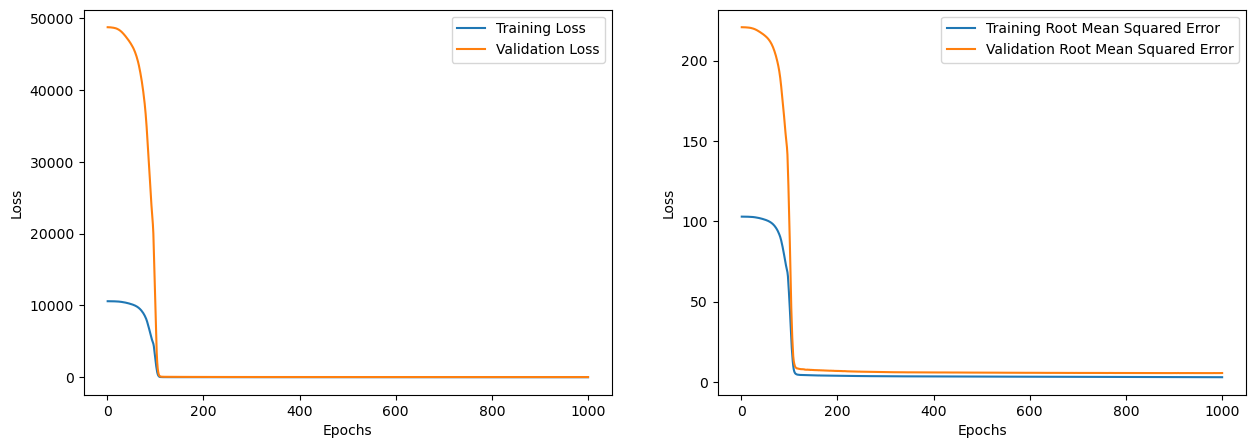

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Microsoft

In [65]:
MSFT_prediction = MSFT_Model.predict(MSFT_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


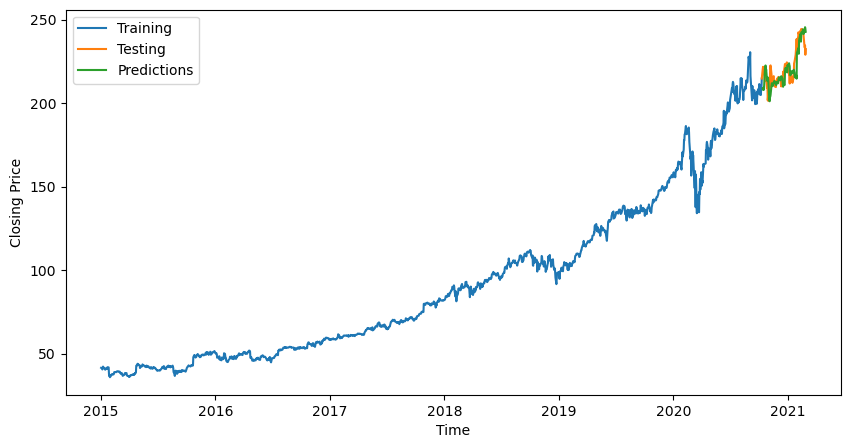

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(MSFT['Date'][MSFT['Date'] < '2020-10-12'], MSFT['Adj. Close'][MSFT['Date'] < '2020-10-12'], label = 'Training')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-09'], MSFT['Adj. Close'][MSFT['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-12'], MSFT_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [67]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Test_Y.reshape(-1, 5))/np.abs(MSFT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 5.591604951927695
MAPE: 0.01816878984283811


# Amazon

In [68]:
AMZN.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,312.58,314.75,306.96,308.52,308.52,2783200.0
1,2015-01-05,307.01,308.38,300.85,302.19,302.19,2774200.0
2,2015-01-06,302.24,303.00,292.38,295.29,295.29,3519000.0
3,2015-01-07,297.50,301.28,295.33,298.42,298.42,2640300.0
4,2015-01-08,300.32,303.14,296.11,300.46,300.46,3088400.0


In [69]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [70]:
# Change Dtype of Date column
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [71]:
AMZN_Date = '2020-11-01'
AMZN_Train_X, AMZN_Train_Y, AMZN_Test_X, AMZN_Test_Y = Dataset(AMZN, AMZN_Date)

### Model Fitting

In [72]:
AMZN_Model = Model()

In [74]:
from tensorflow.keras.metrics import RootMeanSquaredError

AMZN_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[RootMeanSquaredError()])

In [75]:
AMZN_hist = AMZN_Model.fit(AMZN_Train_X, AMZN_Train_Y, epochs = 200, validation_data = (AMZN_Test_X, AMZN_Test_Y), callbacks=[callback])

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2283140.7500 - root_mean_squared_error: 1510.4940 - val_loss: 9901911.0000 - val_root_mean_squared_error: 3146.7302 - learning_rate: 0.0000e+00
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2136660.0000 - root_mean_squared_error: 1460.9268 - val_loss: 9901457.0000 - val_root_mean_squared_error: 3146.6580 - learning_rate: 6.6667e-08
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2243904.7500 - root_mean_squared_error: 1497.9110 - val_loss: 9900606.0000 - val_root_mean_squared_error: 3146.5229 - learning_rate: 1.3333e-07
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2063297.8750 - root_mean_squared_error: 1435.9014 - val_loss: 9899357.0000 - val_root_mean_squared_error: 3146.3245 - learning_rate: 2.0000e-07
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2021475.7500 - root_mean_squared_error: 1419.7753 - val_loss: 9897566.0000 - val_root_mean_squared_error: 3146.0398 - learni

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2160675.0000 - root_mean_squared_error: 1469.4351 - val_loss: 9674841.0000 - val_root_mean_squared_error: 3110.4407 - learning_rate: 2.2667e-06
Epoch 36/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2389801.0000 - root_mean_squared_error: 1544.6608 - val_loss: 9652576.0000 - val_root_mean_squared_error: 3106.8596 - learning_rate: 2.3333e-06
Epoch 37/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2062180.6250 - root_mean_squared_error: 1435.6803 - val_loss: 9624670.0000 - val_root_mean_squared_error: 3102.3652 - learning_rate: 2.4000e-06
Epoch 38/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2016370.0000 - root_mean_squared_error: 1418.6815 - val_loss: 9602059.0000 - val_root_mean_squared_error: 3098.7190 - learning_rate: 2.4667e-06
Epoch 39/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2138139.5000 - root_mean_squared_error: 1462.1678 - val_loss: 9584062.0000 - val_root_mean_squared_error: 3095.8137 - learning_rate:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1947829.6250 - root_mean_squared_error: 1394.9088 - val_loss: 8661559.0000 - val_root_mean_squared_error: 2943.0527 - learning_rate: 4.5333e-06
Epoch 70/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1921083.1250 - root_mean_squared_error: 1385.8588 - val_loss: 8608068.0000 - val_root_mean_squared_error: 2933.9509 - learning_rate: 4.6000e-06
Epoch 71/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1890505.8750 - root_mean_squared_error: 1374.3911 - val_loss: 8552240.0000 - val_root_mean_squared_error: 2924.4214 - learning_rate: 4.6667e-06
Epoch 72/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1861487.0000 - root_mean_squared_error: 1363.6765 - val_loss: 8499827.0000 - val_root_mean_squared_error: 2915.4463 - learning_rate: 4.7333e-06
Epoch 73/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1884502.8750 - root_mean_squared_error: 1372.0823 - val_loss: 8444194.0000 - val_root_mean_squared_error: 2905.8896 - learning_rate:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 204582.6094 - root_mean_squared_error: 450.9702 - val_loss: 729037.7500 - val_root_mean_squared_error: 853.8371 - learning_rate: 6.8000e-06
Epoch 104/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 142205.6875 - root_mean_squared_error: 376.8642 - val_loss: 610013.1250 - val_root_mean_squared_error: 781.0334 - learning_rate: 6.8667e-06
Epoch 105/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 105965.0391 - root_mean_squared_error: 325.4561 - val_loss: 442839.0625 - val_root_mean_squared_error: 665.4615 - learning_rate: 6.9333e-06
Epoch 106/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 90352.0078 - root_mean_squared_error: 300.4346 - val_loss: 372217.4062 - val_root_mean_squared_error: 610.0963 - learning_rate: 7.0000e-06
Epoch 107/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 80133.7500 - root_mean_squared_error: 283.0331 - val_loss: 322618.1875 - val_root_mean_squared_error: 567.9949 - learning_rate: 7.0667e-06
Epoch 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3025.1431 - root_mean_squared_error: 54.7003 - val_loss: 13029.1230 - val_root_mean_squared_error: 114.1452 - learning_rate: 9.1333e-06
Epoch 139/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3435.1714 - root_mean_squared_error: 58.5681 - val_loss: 13010.6631 - val_root_mean_squared_error: 114.0643 - learning_rate: 9.2000e-06
Epoch 140/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3784.0557 - root_mean_squared_error: 61.2367 - val_loss: 12378.2373 - val_root_mean_squared_error: 111.2575 - learning_rate: 9.2667e-06
Epoch 141/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3891.0911 - root_mean_squared_error: 62.2537 - val_loss: 10975.1455 - val_root_mean_squared_error: 104.7623 - learning_rate: 9.3333e-06
Epoch 142/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4131.0166 - root_mean_squared_error: 63.9387 - val_loss: 10327.1777 - val_root_mean_squared_error: 101.6227 - learning_rate: 9.4000e-06
Epoch 143/200
10/10 ━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2659.4392 - root_mean_squared_error: 51.5489 - val_loss: 10492.0771 - val_root_mean_squared_error: 102.4308 - learning_rate: 8.0252e-06
Epoch 174/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2429.0586 - root_mean_squared_error: 48.7342 - val_loss: 10744.0088 - val_root_mean_squared_error: 103.6533 - learning_rate: 7.9453e-06
Epoch 175/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2611.9851 - root_mean_squared_error: 51.0819 - val_loss: 11007.0088 - val_root_mean_squared_error: 104.9143 - learning_rate: 7.8663e-06
Epoch 176/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2823.8262 - root_mean_squared_error: 53.0971 - val_loss: 10727.1113 - val_root_mean_squared_error: 103.5718 - learning_rate: 7.7880e-06
Epoch 177/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2468.2168 - root_mean_squared_error: 49.6221 - val_loss: 10451.9170 - val_root_mean_squared_error: 102.2346 - learning_rate: 7.7105e-06
Epoch 178/200
10/10 ━━━━

In [76]:
history_dict = AMZN_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

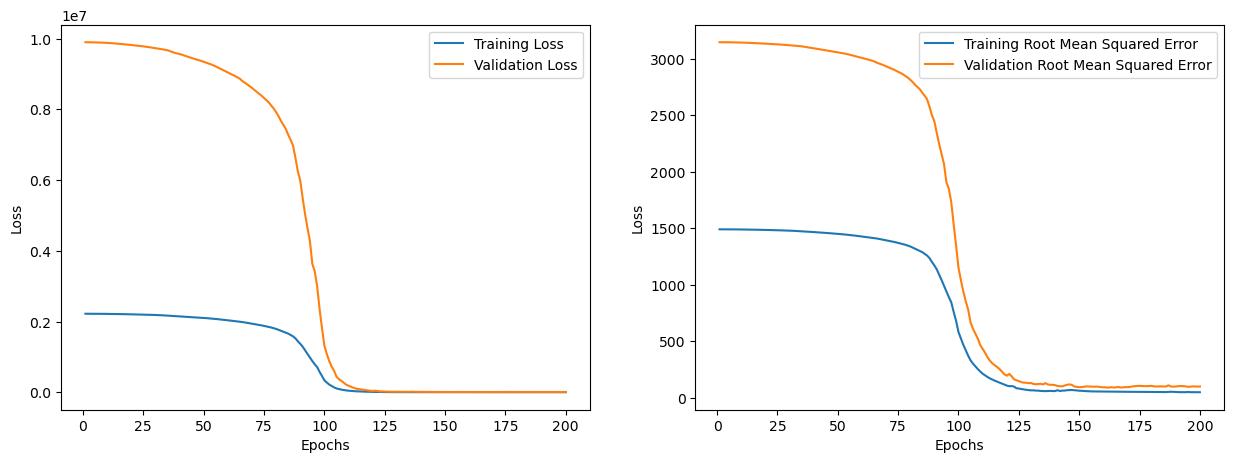

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Amazon

In [78]:
AMZN_prediction = AMZN_Model.predict(AMZN_Test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


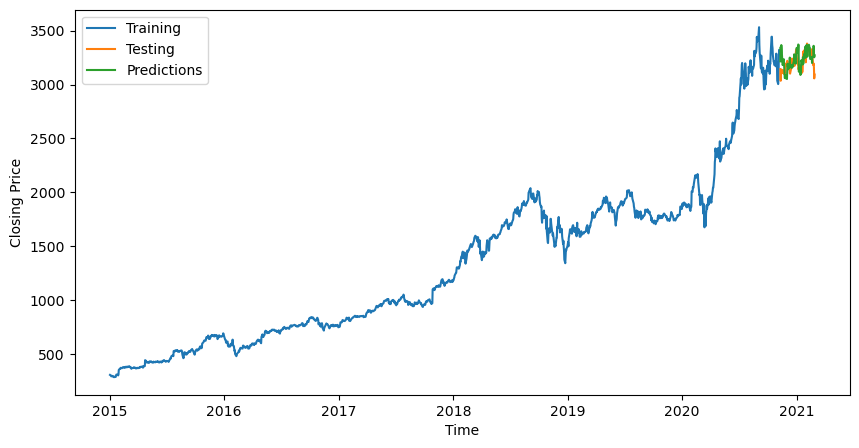

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(AMZN['Date'][AMZN['Date'] < '2020-11-07'], AMZN['Adj. Close'][AMZN['Date'] < '2020-11-07'], label = 'Training')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2020-11-07'], AMZN['Adj. Close'][AMZN['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2020-11-07'], AMZN_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [80]:
rmse = math.sqrt(mean_squared_error(AMZN_Test_Y.reshape(-1, 5), AMZN_prediction))
mape = np.mean(np.abs(AMZN_prediction - AMZN_Test_Y.reshape(-1, 5))/np.abs(AMZN_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 99.3674563477245
MAPE: 0.02460723750896758
